In [1]:
#Import required libraries
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read the train.csv dataset into the kernel
dataset= pd.read_csv("/kaggle/input/ipba17-grade-ml-case-study-classification-code/train.csv")

In [3]:
# Understand the length of the dataset
dataset.shape[0]

1677

In [4]:
# Look at the first few rows of the dataset
dataset.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [5]:
# Look at the column names of the dataset
dataset.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
# Look at the data types of each column in the dataset
dataset.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [7]:
# Look at the descriptive statistics of each column of the dataset
dataset.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [8]:
# A total of 27 columns have been able to be described into summary statistics
# Let's get each of the 35 columns unique values and summary statistics to understand their data types better

dataset.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [9]:
# Column 1- 'id'
dataset['id'].unique()

array([   0,    1,    2, ..., 1674, 1675, 1676])

In [10]:
dataset['id'].unique().shape[0]

1677

In [11]:
dataset['id'].isna().sum()

0

In [12]:
# Column 'id' has unique values for each row, these will not be computationally important, 
# but they will be important to identify the record

In [13]:
# Column 2- 'Age'
dataset['Age'].unique()

array([36, 35, 32, 38, 50, 27, 34, 40, 51, 25, 29, 48, 26, 39, 33, 52, 42,
       30, 43, 24, 41, 47, 31, 56, 44, 28, 46, 18, 45, 37, 49, 53, 54, 23,
       59, 22, 55, 20, 57, 19, 21, 58, 60])

In [14]:
dataset['Age'].unique().shape[0]

43

In [15]:
dataset['Age'].isna().sum()

0

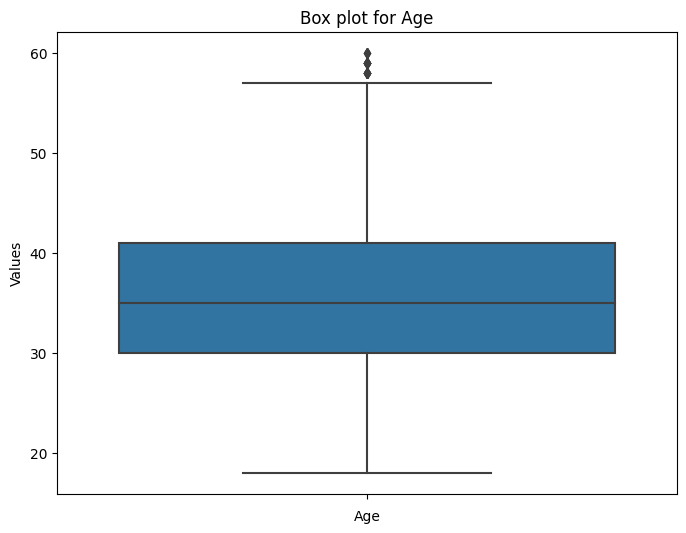

In [16]:
# Create box plots for column
plt.figure(figsize=(8, 6)) 

sns.boxplot(y=dataset['Age'])

plt.title('Box plot for Age')
plt.ylabel('Values')
plt.xlabel('Age')
plt.show()

In [17]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['Age'], 25, method='midpoint')
Q3 = np.percentile(dataset['Age'], 75, method='midpoint')
IQR= Q3-Q1
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['Age'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['Age'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 57.5
22
Lower Bound: 13.5
0


In [18]:
# IQR Capping and Outlier Treatment
dataset['Age'] = dataset['Age'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [19]:
# Column 'Age' is a continuous variable with 43 unique values. 
# It doesn't have any missing values. 
# It has 22 values above the Upper IQR bound which seem like outliers, but they are well within 60. 
# Outlier treatment done for 3 observations.  

In [20]:
# Column 3- 'BusinessTravel'
dataset['BusinessTravel'].unique()

array(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'], dtype=object)

In [21]:
dataset['BusinessTravel'].isna().sum()

0

In [22]:
# Column 'BusinessTravel' is a categorical variable with 3 unique values. It doesn't have any missing values. 
# It signifies how much business travel the employee engages in. It will have to be converted into a dummy variable.
# No Outliers to treat. 

In [23]:
# Column 4- 'DailyRate'
dataset['DailyRate'].unique()

array([ 599,  921,  718, 1488, 1017,  566,  944, 1009, 1297,  806,  885,
        694,  138, 1287,  884,  640,  894,  607, 1495, 1092, 1392, 1082,
       1107,  530,  746, 1005,  796,  228, 1358,  959, 1276, 1349,  154,
       1277,  979,  300,  555,  874, 1443,  933,  833, 1001,  469, 1217,
        301,  119, 1469,  994,  932,  809, 1179, 1434,  869, 1198, 1427,
       1383,  528,  548, 1097, 1413,  322,  319, 1401,  477,  999, 1223,
        769, 1339,  523, 1003, 1018,  672, 1099, 1396,  465, 1333,  604,
       1206, 1313, 1275,  653, 1219, 1336,  144, 1137, 1063, 1403,  942,
        723,  571,  442, 1303, 1450,  857,  807,  682,  790, 1332, 1168,
        598, 1142,  920,  691,  882,  895,  464,  658,  954,  715,  853,
       1136, 1283, 1448,  804,  546,  775, 1319, 1146,  359,  383,  821,
       1323,  543, 1288, 1479,  350,  603,  835,  489,  750,  462,  426,
        688,  466, 1311, 1377,  991,  713, 1211,  304, 1362,  783,  575,
        641,  689, 1302,  136,  602,  207,  632,  6

In [24]:
dataset['DailyRate'].unique().shape[0]

625

In [25]:
dataset['DailyRate'].isna().sum()

0

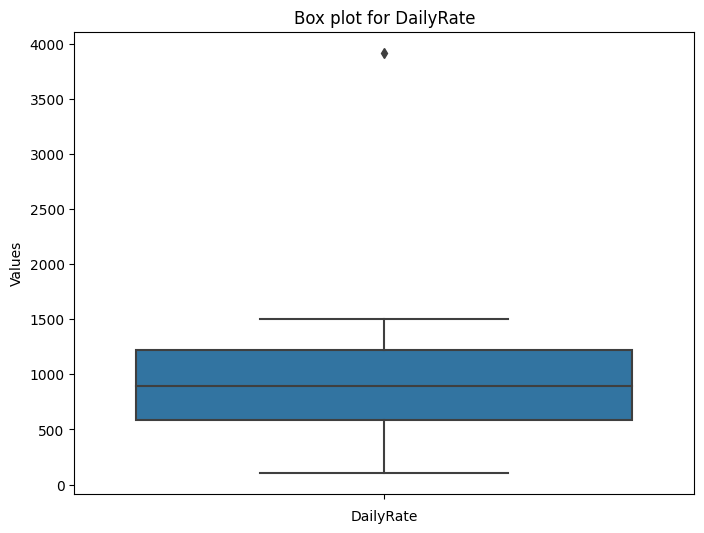

In [26]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['DailyRate'])

plt.title('Box plot for DailyRate')
plt.ylabel('Values')
plt.xlabel('DailyRate')
plt.show()

In [27]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['DailyRate'], 25, method='midpoint')
Q3 = np.percentile(dataset['DailyRate'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['DailyRate'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['DailyRate'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 589.0
Q3: 1223.0
IQR: 634.0
Upper Bound: 2174.0
No of observations above Upper Bound: 1
Lower Bound: -362.0
No of observations below Lower Bound: 0


In [28]:
# IQR Capping and Outlier Treatment
dataset['DailyRate'] = dataset['DailyRate'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [29]:
# Column 'DailyRate' is a continuous variable with 625 unique values. It doesn't have any missing values. 
# This column could be pertaining to the daily salary rate of each employee. This needs to be investigated further. 
# Outlier treatment done for 1 observation.

In [30]:
# Column 5- 'Department'
dataset['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [31]:
dataset['Department'].isna().sum()

0

In [32]:
# Column 'Department' is a categorical variable with 3 unique values. It doesn't have any missing values. 
# It signifies what department the employee belongs to. It will have to be converted into a dummy variable.
# No Outliers to treat. 

In [33]:
# Column 6- 'DistanceFromHome'
dataset['DistanceFromHome'].unique()

array([24,  8, 26,  2,  5, 10,  6,  9, 28,  1, 25, 11,  7, 18,  3, 17, 14,
        4, 16, 15, 23, 20, 12, 29, 19, 22, 13, 27, 21])

In [34]:
dataset['DistanceFromHome'].unique().shape[0]

29

In [35]:
dataset['DistanceFromHome'].isna().sum()

0

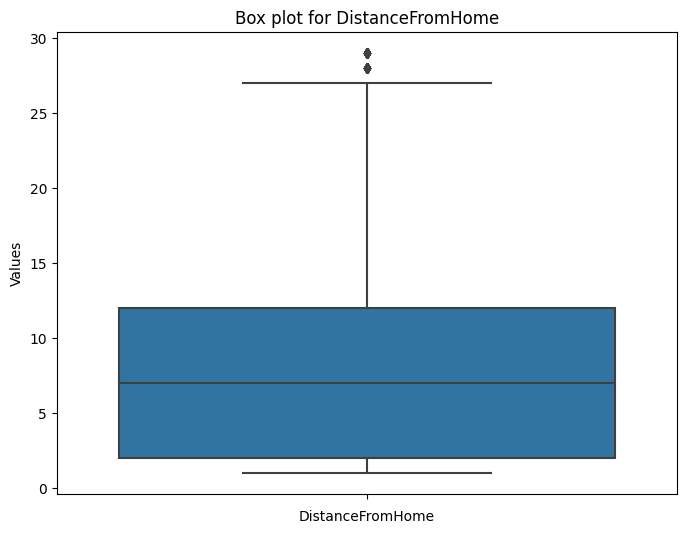

In [36]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['DistanceFromHome'])

plt.title('Box plot for DistanceFromHome')
plt.ylabel('Values')
plt.xlabel('DistanceFromHome')
plt.show()

In [37]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['DistanceFromHome'], 25, method='midpoint')
Q3 = np.percentile(dataset['DistanceFromHome'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['DistanceFromHome'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['DistanceFromHome'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 2.0
Q3: 12.0
IQR: 10.0
Upper Bound: 27.0
No of observations above Upper Bound: 62
Lower Bound: -13.0
No of observations below Lower Bound: 0


In [38]:
# IQR Capping and Outlier Treatment
dataset['DistanceFromHome'] = dataset['DistanceFromHome'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [39]:
# Column 6
# Column 'DistanceFromHome' is a continuous variable with 29 unique values. It doesn't have any missing values.
# Outlier treatment (IQR capping) done for 62 observations.

In [40]:
# Column 7- 'Education'
dataset['Education'].unique()

array([ 3,  4,  1,  2,  5, 15])

In [41]:
dataset['Education'].unique().shape[0]

6

In [42]:
count_true_condition = (dataset['Education'] == 15).sum()
count_true_condition

1

In [43]:
dataset['Education'].describe()
dataset.loc[dataset['Education'] == '15', 'Education'] = '5'

In [44]:
dataset['Education'].isna().sum()

0

In [45]:
# Column 'Education' is a categorical variable with 6 unique values- coded ordinally. 
# However, the 6th value is 15 which seems a wrong entry. It is only present in 1 row and is changed to 5, since mean is nearer 2.93 and median is 3. 
# It doesn't have any missing values. 
# This would have a data dictionary. 
# It signifies what level of education the employee has. 
# No Outliers to treat.

In [46]:
# Column 8- 'EducationField'
dataset['EducationField'].unique()

array(['Medical', 'Other', 'Marketing', 'Life Sciences',
       'Technical Degree', 'Human Resources'], dtype=object)

In [47]:
dataset['EducationField'].unique().shape[0]

6

In [48]:
dataset['EducationField'].isna().sum()

0

In [49]:
# Column 'EducationField' is a categorical variable with 6 unique values. It doesn't have any missing values. 
# It signifies what field of education the employee belongs to. It will have to be converted into a dummy variable.
# No Outliers to treat.

In [50]:
# Column 9- 'EmployeeCount'
dataset['EmployeeCount'].unique()

array([1])

In [51]:
# Column 'EmployeeCount' is an integer variable with just 1 unique value. It doesn't have any missing values. 
# It signifies how many employees belong to 1 id. This column doesnt give us any information and will need to be dropped. 
# No Outliers to treat.

In [52]:
# Column 10- 'EnvironmentSatisfaction'
dataset['EnvironmentSatisfaction'].unique()

array([4, 1, 3, 2])

In [53]:
dataset['EnvironmentSatisfaction'].unique().shape[0]

4

In [54]:
dataset['EnvironmentSatisfaction'].isna().sum()

0

In [55]:
# Column 'EnvironmentSatisfaction' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary and will define what it signifies.
# No Outliers to treat.

In [56]:
# Column 11- 'Gender'
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [57]:
dataset['Gender'].isna().sum()

0

In [58]:
# Column 'Gender' is a categorical variable with 2 unique values.It doesn't have any missing values. 
# It signifies to which gender the employee belongs to. It will have to be converted into a dummy variable.
# No Outliers to treat.

In [59]:
# Column 12- 'HourlyRate'
dataset['HourlyRate'].unique()

array([ 42,  46,  80,  40,  37,  56,  36,  74,  43,  82,  68,  65,  95,
        81,  62,  83,  87,  96,  77,  60,  59,  51,  86,  76,  75,  54,
        73,  48,  52,  71,  78,  79,  70,  72, 100,  93,  90,  64,  97,
        84,  38,  33,  53,  58,  98,  89,  92,  50,  66,  30,  61,  91,
        44,  63,  32,  39,  88,  45,  41,  69,  99,  49,  57,  35,  31,
        94,  85,  55,  47,  67,  34])

In [60]:
dataset['HourlyRate'].unique().shape[0]

71

In [61]:
dataset['HourlyRate'].isna().sum()

0

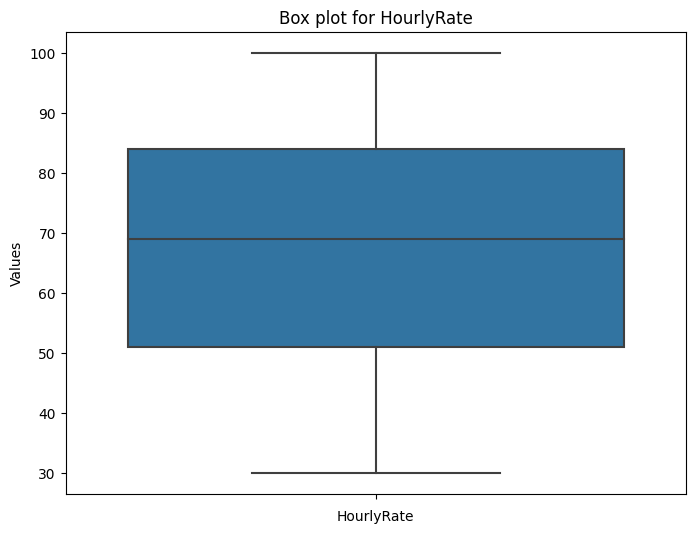

In [62]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['HourlyRate'])

plt.title('Box plot for HourlyRate')
plt.ylabel('Values')
plt.xlabel('HourlyRate')
plt.show()

In [63]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['HourlyRate'], 25, method='midpoint')
Q3 = np.percentile(dataset['HourlyRate'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['HourlyRate'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['HourlyRate'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 51.0
Q3: 84.0
IQR: 33.0
Upper Bound: 133.5
No of observations above Upper Bound: 0
Lower Bound: 1.5
No of observations below Lower Bound: 0


In [64]:
# Column 'HourlyRate' is a continuous variable with 71 unique values. It doesn't have any missing values. 
# This column could be pertaining to the hourly salary rate of each employee for calculating overtime. 
# This needs to be investigated further. 
# No Outliers to treat.

In [65]:
# Column 13- 'JobInvolvement'
dataset['JobInvolvement'].unique()

array([3, 1, 2, 4])

In [66]:
dataset['JobInvolvement'].unique().shape[0]

4

In [67]:
dataset['JobInvolvement'].isna().sum()

0

In [68]:
# Column 'JobInvolvement' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary which would confirm what this column signifies.
# No Outliers to treat.

In [69]:
# Column 14- 'JobLevel'
dataset['JobLevel'].unique()

array([1, 2, 5, 3, 4, 7])

In [70]:
dataset['JobLevel'].unique().shape[0]

6

In [71]:
dataset['JobLevel'].isna().sum()

0

In [72]:
# Column 'JobLevel' is a categorical variable with 6 unique values- coded ordinally.
# No row is coded at JobLevel 6. 
# It doesn't have any missing values. 
# This would have a data dictionary which would confirm what this column signifies.
# No Outliers to treat.

In [73]:
# Column 15- 'JobRole'
dataset['JobRole'].unique()

array(['Laboratory Technician', 'Sales Representative', 'Sales Executive',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director'],
      dtype=object)

In [74]:
dataset['JobRole'].unique().shape[0]

9

In [75]:
dataset['JobRole'].isna().sum()

0

In [76]:
# Column 'JobRole' is a categorical variable with 9 unique values.It doesn't have any missing values. 
# It signifies to what Job role the employee works in. It will have to be converted into a dummy variable. 
# The correlation between 'JobRole' and 'JobLevel' needs to be seen. 
# No Outliers to treat.

In [77]:
# Column 16- 'JobSatisfaction'
dataset['JobSatisfaction'].unique()

array([4, 1, 2, 3])

In [78]:
dataset['JobSatisfaction'].unique().shape[0]

4

In [79]:
dataset['JobSatisfaction'].isna().sum()

0

In [80]:
# Column 'JobSatisfaction' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. This signifies what is the job satisfaction that the employee has.
# No Outliers to treat.

In [81]:
# Column 17- 'MaritalStatus'
dataset['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [82]:
dataset['MaritalStatus'].isna().sum()

0

In [83]:
# Column 'MaritalStatus' is a categorical variable with 3 unique values.
# It doesn't have any missing values. 
# This signifies what is the marital status of the employee. It will have to be converted into a dummy variable. 
# No Outliers to treat.

In [84]:
# Column 18- 'MonthlyIncome'
dataset['MonthlyIncome'].unique()

array([ 2596,  2899,  4627,  5347, 19033,  4197,  1281,  3067,  6439,
        2741,  2691,  8628,  3280,  2387,  3102,  4449,  2539,  7441,
       17169,  4374,  2413,  2436, 19943,  3312,  4373,  4834, 16015,
        5296,  2389,  9396,  6142,  4490,  5228,  5562,  5745,  3780,
        9985,  6949,  2398, 12965,  2018,  2853,  2795,  5744, 10932,
       12169,  1611,  9714,  2836,  4787,  8321,  3057,  2132,  2468,
        3441,  4724,  2683,  2379,  2544,  2362, 13194,  5605, 19161,
        2496, 19436,  5507,  4422, 10725,  6162,  3875,  4448, 17099,
       19626, 19513,  5346,  7637, 13348,  6220,  2564,  5309,  2559,
        3989,  2585,  6384,  5253,  4171,  2693,  1232,  3944, 19202,
       16064,  1569,  2514, 17856,  6540, 10673,  5163,  2942,  4301,
        6146,  9278,  2782,  2013,  5906,  2519, 16659,  3072, 10502,
        5813,  3838,  3491, 17046, 18041,  7412,  5324,  2394, 10169,
        6434,  6377,  9713,  6883,  8726,  2500,  6755, 18711,  8998,
        2835, 11836,

In [85]:
dataset['MonthlyIncome'].unique().shape[0]

895

In [86]:
dataset['MonthlyIncome'].isna().sum()

0

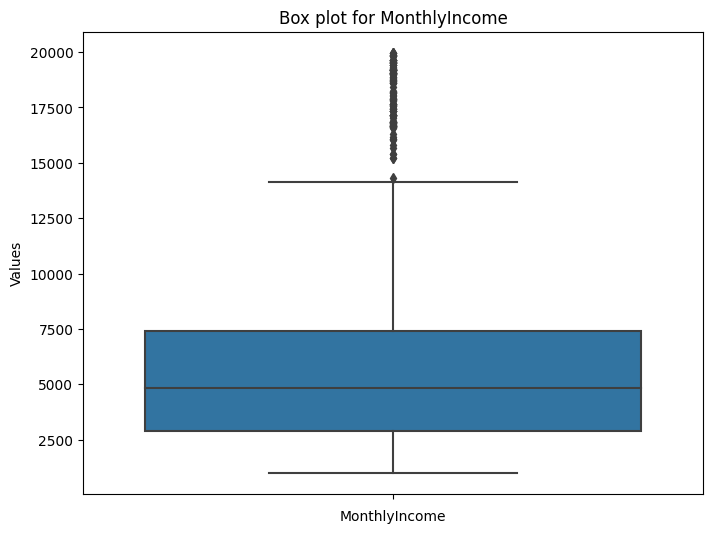

In [87]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['MonthlyIncome'])

plt.title('Box plot for MonthlyIncome')
plt.ylabel('Values')
plt.xlabel('MonthlyIncome')
plt.show()

In [88]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['MonthlyIncome'], 25, method='midpoint')
Q3 = np.percentile(dataset['MonthlyIncome'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['MonthlyIncome'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['MonthlyIncome'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 2875.0
Q3: 7403.0
IQR: 4528.0
Upper Bound: 14195.0
No of observations above Upper Bound: 139
Lower Bound: -3917.0
No of observations below Lower Bound: 0


In [89]:
# IQR Capping and Outlier Treatment
dataset['MonthlyIncome'] = dataset['MonthlyIncome'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [90]:
# Column 'MonthlyIncome' is a continuous variable with 895 unique values. It doesn't have any missing values. 
# This column could be pertaining to the monthly income of each employee. 
# This needs to be investigated further. 
# Outlier treatment (IQR capping) done for 139 observations.

In [91]:
# Column 19- 'MonthlyRate'
dataset['MonthlyRate'].unique()

array([ 5099, 10778, 16495, 13384, 19805,  7103, 16900, 12916, 21221,
        7950, 13586, 13939,  7288,  4759,  4284,  6194, 16192, 21143,
        3449, 17000, 26314, 17198, 19982, 22474, 11512,  9129, 24619,
       25761, 14229,  7246,  5174, 23848, 25440, 12368,  4257,  9262,
        5598, 16530,  8059, 17231, 17491, 25174, 22245, 11162, 22490,
        8770,  9148,  7259,  8891,  9192, 16090, 20763, 19944, 13137,
       21643, 11103,  2851, 20308, 23398,  8828, 15276, 14977, 16225,
        9679, 15896,  5518,  5456, 12477, 25265, 10842,  7790, 17312,
       11806, 11873,  2373, 19757, 14074,  9100,  6161, 16374, 20364,
        7160,  4605,  4223,  8269, 26999, 12828, 20431,  3140, 16379,
       11012, 20338, 15232, 26250, 23177,  9150, 22021, 26236,  2354,
        5602,  2125,  9490, 20460,  4658, 22149,  5033, 12106, 12392,
       17519, 23474, 14255, 25751, 18611, 11677,  6865, 22553, 19271,
       18767, 23293, 13934, 22162, 20990, 23683, 14369,  8509, 17381,
       16053, 13982,

In [92]:
dataset['MonthlyRate'].unique().shape[0]

903

In [93]:
dataset['MonthlyRate'].isna().sum()

0

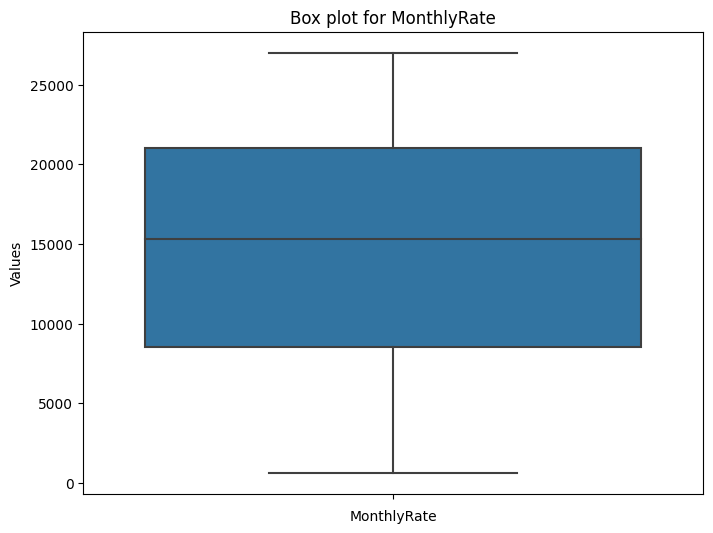

In [94]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['MonthlyRate'])

plt.title('Box plot for MonthlyRate')
plt.ylabel('Values')
plt.xlabel('MonthlyRate')
plt.show()

In [95]:
# Column 'MonthlyRate' is a continuous variable with 903 unique values. 
# It doesn't have any missing values. 
# This column needs data dictionary. 
# This needs to be investigated further. 
# No Outliers to treat.

In [96]:
# Column 20- 'NumCompaniesWorked'
dataset['NumCompaniesWorked'].unique()

array([1, 0, 3, 5, 2, 8, 6, 7, 9, 4])

In [97]:
dataset['NumCompaniesWorked'].unique().shape[0]

10

In [98]:
dataset['NumCompaniesWorked'].isna().sum()

0

In [99]:
# Column 'NumCompaniesWorked' is a categorical variable with 10 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the no of companies that the employee has worked with.
# No Outliers to treat.

In [100]:
# Column 21- 'Over18'
dataset['Over18'].unique()

array(['Y'], dtype=object)

In [101]:
dataset['Over18'].isna().sum()

0

In [102]:
# Column 'Over18' is a categorical variable with just 1 unique value. 
# It doesn't have any missing values. 
# It signifies whether the employee is above 18 years of age. 
# This column doesnt give us any information and will need to be dropped. 
# No Outliers to treat.

In [103]:
# Column 22- 'OverTime'
dataset['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [104]:
dataset['OverTime'].unique().shape[0]

2

In [105]:
dataset['OverTime'].isna().sum()

0

In [106]:
# Column 'OverTime' is a categorical variable with 2 unique values.
# It doesn't have any missing values. 
# This signifies whether the employee has worked overtime. 
# It will have to be converted into a dummy variable.
# Whether to drop this column or not will have to be seen.
# No Outliers to treat.

In [107]:
# Column 23- 'PercentSalaryHike'
dataset['PercentSalaryHike'].unique()

array([13, 17, 14, 11, 12, 15, 21, 16, 18, 19, 24, 22, 23, 20, 25])

In [108]:
dataset['PercentSalaryHike'].unique().shape[0]

15

In [109]:
dataset['PercentSalaryHike'].isna().sum()

0

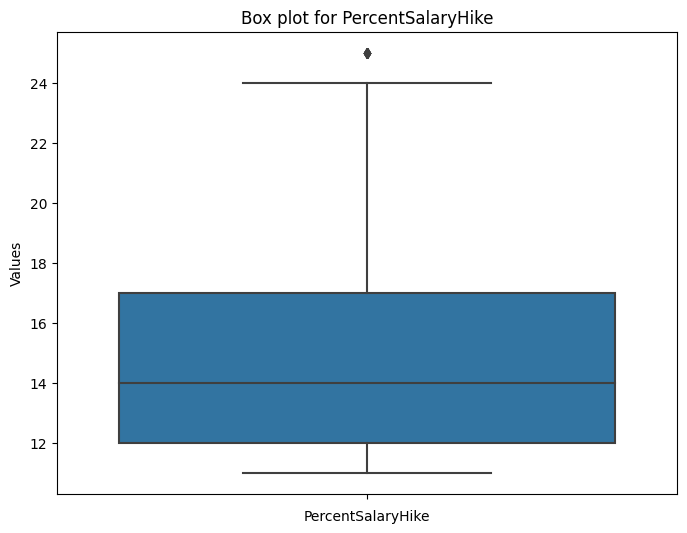

In [110]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['PercentSalaryHike'])

plt.title('Box plot for PercentSalaryHike')
plt.ylabel('Values')
plt.xlabel('PercentSalaryHike')
plt.show()

In [111]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['PercentSalaryHike'], 25, method='midpoint')
Q3 = np.percentile(dataset['PercentSalaryHike'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['PercentSalaryHike'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['PercentSalaryHike'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 12.0
Q3: 17.0
IQR: 5.0
Upper Bound: 24.5
No of observations above Upper Bound: 10
Lower Bound: 4.5
No of observations below Lower Bound: 0


In [112]:
# IQR Capping and Outlier Treatment
dataset['PercentSalaryHike'] = dataset['PercentSalaryHike'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [113]:
# Column 'PercentSalaryHike' is a continuous variable with 15 unique values. 
# It doesn't have any missing values. 
# This column signifies the %ge salary hike that they have received in last appraisal.  
# Outlier treatment (IQR capping) done for 10 observations.

In [114]:
# Column 24- 'PerformanceRating'
dataset['PerformanceRating'].unique()

array([3, 4])

In [115]:
dataset['PerformanceRating'].unique().shape[0]


2

In [116]:
dataset['PerformanceRating'].isna().sum()

0

In [117]:
# Column 'PerformanceRating' is a categorical variable with 2 unique values- seeming to be coded ordinally. BUt where are values 1, 2?
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the performance rating that the employee has received in last appraisal.
# This column seems to have lesser information than 'PercentSalaryHike' and could be dropped. 

In [118]:
# Column 25- 'RelationshipSatisfaction'
dataset['RelationshipSatisfaction'].unique()

array([2, 4, 3, 1])

In [119]:
dataset['RelationshipSatisfaction'].unique().shape[0]

4

In [120]:
dataset['RelationshipSatisfaction'].isna().sum()

0

In [121]:
# Column 'RelationshipSatisfaction' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the satisfaction that the employee has in their relationship.
# No Outliers to treat.

In [122]:
# Column 26- 'StandardHours'
dataset['StandardHours'].unique()

array([80])

In [123]:
dataset['StandardHours'].unique().shape[0]

1

In [124]:
dataset['StandardHours'].isna().sum()

0

In [125]:
# Column 'StandardHours' is a numerical variable with just 1 unique value. 
# It doesn't have any missing values. 
# It signifies the standard working hours of every employee. 
# This column doesnt give us any information and will need to be dropped. 
# No Outliers to treat.

In [126]:
# Column 27- 'StockOptionLevel'
dataset['StockOptionLevel'].unique()

array([1, 2, 0, 3])

In [127]:
dataset['StockOptionLevel'].unique().shape[0]

4

In [128]:
dataset['StockOptionLevel'].isna().sum()

0

In [129]:
# Column 'StockOptionLevel' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the stock option level that the employee belongs to.
# No Outliers to treat.

In [130]:
# Column 28- 'TotalWorkingYears'
dataset['TotalWorkingYears'].unique()

array([10,  4, 15, 31,  6,  1, 18,  9, 17, 20, 28, 21,  5,  8, 33,  2, 12,
       11, 13, 24, 16,  0, 23,  7, 26, 32, 19, 22, 14,  3, 27, 30, 37, 34,
       40, 36, 29, 25, 38, 41, 35])

In [131]:
dataset['TotalWorkingYears'].unique().shape[0]

41

In [132]:
dataset['TotalWorkingYears'].isna().sum()

0

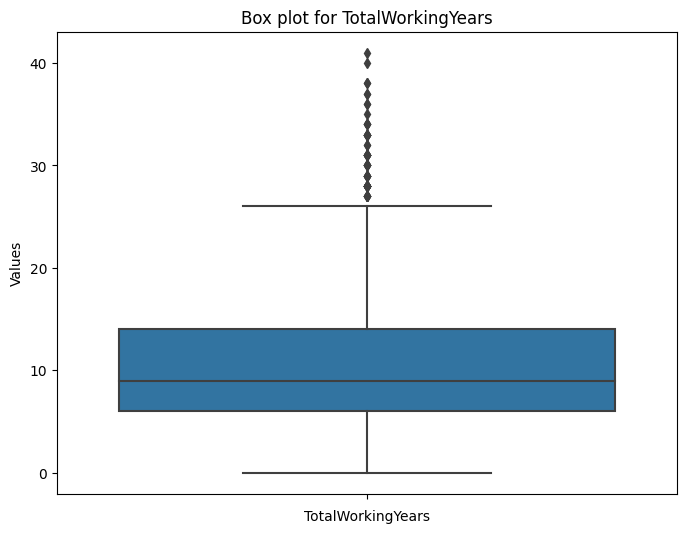

In [133]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['TotalWorkingYears'])

plt.title('Box plot for TotalWorkingYears')
plt.ylabel('Values')
plt.xlabel('TotalWorkingYears')
plt.show()

In [134]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['TotalWorkingYears'], 25, method='midpoint')
Q3 = np.percentile(dataset['TotalWorkingYears'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['TotalWorkingYears'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['TotalWorkingYears'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 6.0
Q3: 14.0
IQR: 8.0
Upper Bound: 26.0
No of observations above Upper Bound: 87
Lower Bound: -6.0
No of observations below Lower Bound: 0


In [135]:
# IQR Capping and Outlier Treatment
dataset['TotalWorkingYears'] = dataset['TotalWorkingYears'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [136]:
# Column 'TotalWorkingYears' is a continuous variable with just 41 unique value. 
# It doesn't have any missing values. 
# It signifies the total working years or career experience of every employee.
# Outlier treatment (IQR capping) done for 87 observations.

In [137]:
# Column 29- 'TrainingTimesLastYear'
dataset['TrainingTimesLastYear'].unique()

array([2, 3, 1, 0, 5, 4, 6])

In [138]:
dataset['TrainingTimesLastYear'].unique().shape[0]

7

In [139]:
dataset['TrainingTimesLastYear'].isna().sum()

0

In [140]:
# Column 'TrainingTimesLastYear' is a numerical variable with 7 unique value.  
# It doesn't have any missing values. 
# It signifies the no of trainings that the employee received last year.
# No Outliers to treat.

In [141]:
# Column 30- 'WorkLifeBalance'
dataset['WorkLifeBalance'].unique()

array([3, 1, 2, 4])

In [142]:
dataset['WorkLifeBalance'].unique().shape[0]

4

In [143]:
dataset['WorkLifeBalance'].isna().sum()

0

In [144]:
# Column 'WorkLifeBalance' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the type of work-life balance that the employee has.
# No Outliers to treat.

In [145]:
# Column 31- 'YearsAtCompany'
dataset['YearsAtCompany'].unique()

array([10,  4,  3,  6, 31,  1, 16,  9,  2,  7,  5, 20, 13,  0,  8, 11, 19,
       33, 15, 12, 24, 17, 34, 18, 29, 21, 22, 14, 27, 26, 30, 37, 41, 25])

In [146]:
dataset['YearsAtCompany'].unique().shape[0]

34

In [147]:
dataset['YearsAtCompany'].isna().sum()

0

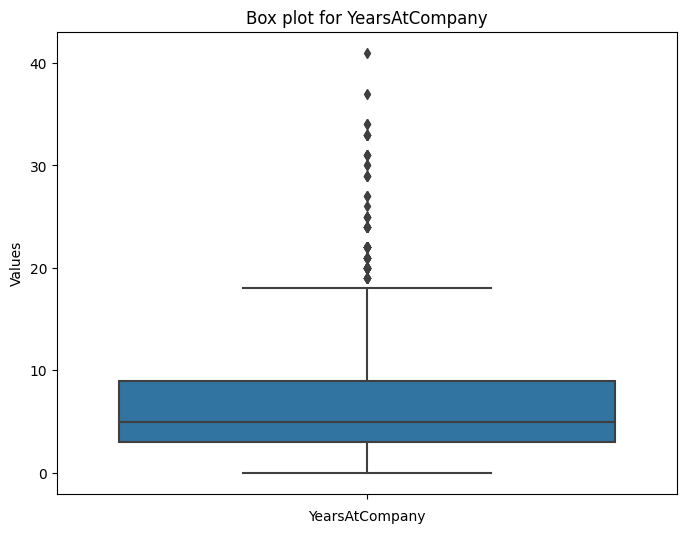

In [148]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['YearsAtCompany'])

plt.title('Box plot for YearsAtCompany')
plt.ylabel('Values')
plt.xlabel('YearsAtCompany')
plt.show()

In [149]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['YearsAtCompany'], 25, method='midpoint')
Q3 = np.percentile(dataset['YearsAtCompany'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['YearsAtCompany'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['YearsAtCompany'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 3.0
Q3: 9.0
IQR: 6.0
Upper Bound: 18.0
No of observations above Upper Bound: 115
Lower Bound: -6.0
No of observations below Lower Bound: 0


In [150]:
# IQR Capping and Outlier Treatment
dataset['YearsAtCompany'] = dataset['YearsAtCompany'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [151]:
# Column 'YearsAtCompany' is a continuous variable with just 34 unique value. 
# It doesn't have any missing values. 
# It signifies the total working years or tenure of every employee within this company.
# Outlier treatment (IQR capping) done for 115 observations.

In [152]:
# Column 32- 'YearsInCurrentRole'
dataset['YearsInCurrentRole'].unique()

array([ 0,  2, 14,  7,  9,  4,  3,  1,  8, 11,  6,  5, 18, 10, 12, 13, 16,
       17, 15])

In [153]:
dataset['YearsInCurrentRole'].unique().shape[0]

19

In [154]:
dataset['YearsInCurrentRole'].isna().sum()

0

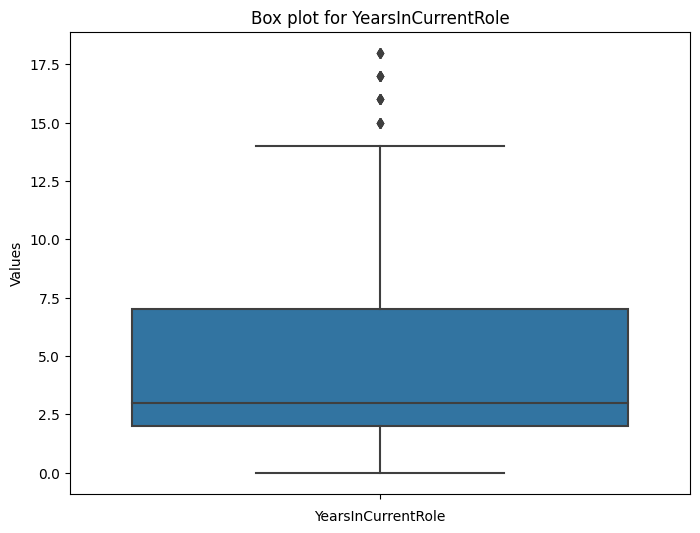

In [155]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['YearsInCurrentRole'])

plt.title('Box plot for YearsInCurrentRole')
plt.ylabel('Values')
plt.xlabel('YearsInCurrentRole')
plt.show()

In [156]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['YearsInCurrentRole'], 25, method='midpoint')
Q3 = np.percentile(dataset['YearsInCurrentRole'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['YearsInCurrentRole'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['YearsInCurrentRole'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 2.0
Q3: 7.0
IQR: 5.0
Upper Bound: 14.5
No of observations above Upper Bound: 21
Lower Bound: -5.5
No of observations below Lower Bound: 0


In [157]:
# IQR Capping and Outlier Treatment
dataset['YearsInCurrentRole'] = dataset['YearsInCurrentRole'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [158]:
# Column 'YearsInCurrentRole' is a continuous variable with 19 unique value. 
# It doesn't have any missing values. 
# It signifies the no of years of every employee in the current role.
# Outlier treatment (IQR capping) done for 21 observations.

In [159]:
# Column 33- 'YearsSinceLastPromotion'
dataset['YearsSinceLastPromotion'].unique()

array([ 7,  0,  1,  4,  2,  6,  3, 13,  5, 11, 15,  8,  9, 10, 14, 12])

In [160]:
dataset['YearsSinceLastPromotion'].unique().shape[0]

16

In [161]:
dataset['YearsSinceLastPromotion'].isna().sum()

0

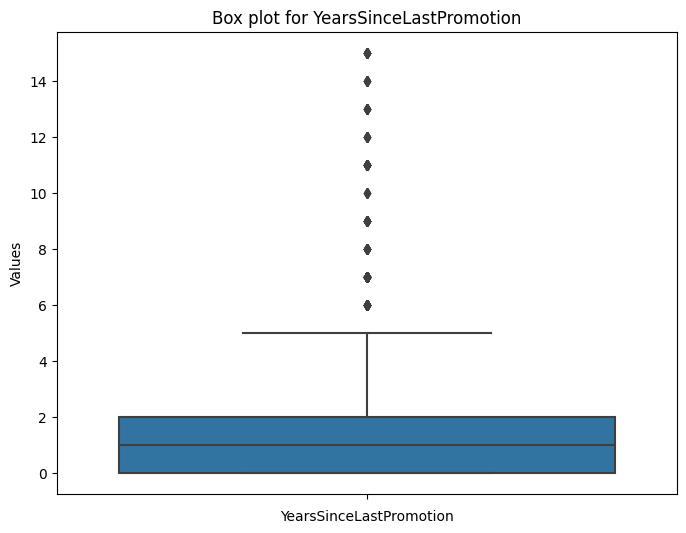

In [162]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['YearsSinceLastPromotion'])

plt.title('Box plot for YearsSinceLastPromotion')
plt.ylabel('Values')
plt.xlabel('YearsSinceLastPromotion')
plt.show()

In [163]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['YearsSinceLastPromotion'], 25, method='midpoint')
Q3 = np.percentile(dataset['YearsSinceLastPromotion'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['YearsSinceLastPromotion'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['YearsSinceLastPromotion'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 0.0
Q3: 2.0
IQR: 2.0
Upper Bound: 5.0
No of observations above Upper Bound: 265
Lower Bound: -3.0
No of observations below Lower Bound: 0


In [164]:
# IQR Capping and Outlier Treatment
dataset['YearsSinceLastPromotion'] = dataset['YearsSinceLastPromotion'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [165]:
# Column 'YearsSinceLastPromotion' is a continuous variable with 16 unique value. 
# It doesn't have any missing values. 
# It signifies the no of years since the last promotion of every employee.
# Although this seems to be talking about the same data as 'YearsInCurrentRole', we need to cross check these columns and drop 1 one of them.
# Outlier treatment (IQR capping) done for 265 observations.

In [166]:
# Column 34- 'YearsWithCurrManager'
dataset['YearsWithCurrManager'].unique()

array([ 8,  3,  2, 10,  0,  9,  7,  4,  1, 13, 12,  5,  6, 11, 17, 15, 16,
       14])

In [167]:
dataset['YearsWithCurrManager'].unique().shape[0]

18

In [168]:
dataset['YearsWithCurrManager'].isna().sum()

0

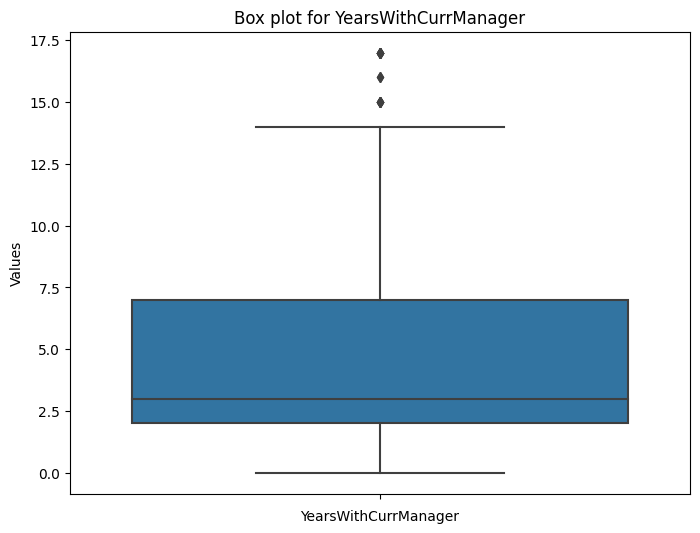

In [169]:
# Create box plots for column
plt.figure(figsize=(8, 6))  

sns.boxplot(y=dataset['YearsWithCurrManager'])

plt.title('Box plot for YearsWithCurrManager')
plt.ylabel('Values')
plt.xlabel('YearsWithCurrManager')
plt.show()

In [170]:
# Using IQR to identify the Outliers
Q1 = np.percentile(dataset['YearsWithCurrManager'], 25, method='midpoint')
Q3 = np.percentile(dataset['YearsWithCurrManager'], 75, method='midpoint')
IQR= Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(dataset['YearsWithCurrManager'] >= upper)
print("Upper Bound:", upper)
print("No of observations above Upper Bound:", upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(dataset['YearsWithCurrManager'] <= lower)
print("Lower Bound:", lower)
print("No of observations below Lower Bound:", lower_array.sum())

Q1: 2.0
Q3: 7.0
IQR: 5.0
Upper Bound: 14.5
No of observations above Upper Bound: 16
Lower Bound: -5.5
No of observations below Lower Bound: 0


In [171]:
# IQR Capping and Outlier Treatment
dataset['YearsWithCurrManager'] = dataset['YearsWithCurrManager'].apply(lambda x: upper if x > upper else (lower if x < lower else x))

In [172]:
# Column 'YearsWithCurrManager' is a continuous variable with 18 unique value. 
# It doesn't have any missing values. 
# It signifies the no of years with the current manager of every employee.
# Outlier treatment (IQR capping) done for 16 observations.

In [173]:
# Column 35- 'Attrition'
dataset['Attrition'].unique()

array([0, 1])

In [174]:
dataset['Attrition'].isna().sum()

0

In [175]:
# Column 'Attrition' is a target variable with 2 unique value. 
# It doesn't have any missing values. 

In [176]:
# Column 1
# Column 'id' has unique values for each row, these will not be computationally important, 
# but they will be important to identify the record

# Column 1
# Column 'Age' is a continuous variable with 43 unique values. 
# It doesn't have any missing values. 
# It has 22 values above the Upper IQR bound which seem like outliers, but they are well within 60. 
# Outlier treatment done for 3 observations.  

# Column 3
# Column 'BusinessTravel' is a categorical variable with 3 unique values. It doesn't have any missing values. 
# It signifies how much business travel the employee engages in. It will have to be converted into a dummy variable.
# No Outliers to treat. 

# Column 4
# Column 'DailyRate' is a continuous variable with 625 unique values. It doesn't have any missing values. 
# This column could be pertaining to the daily salary rate of each employee. This needs to be investigated further. 
# Outlier treatment done for 1 observation. 

# Column 5
# # Column 'Department' is a categorical variable with 3 unique values. It doesn't have any missing values. 
# It signifies what department the employee belongs to. It will have to be converted into a dummy variable.
# No Outliers to treat. 

# Column 6
# Column 'DistanceFromHome' is a continuous variable with 29 unique values. It doesn't have any missing values.
# Outlier treatment (IQR capping) done for 62 observations.

# Column 7
# # Column 'Education' is a categorical variable with 6 unique values- coded ordinally. 
# However, the 6th value is 15 which seems a wrong entry. It is only present in 1 row and is changed to 5, since mean is nearer 2.93 and median is 3. 
# It doesn't have any missing values. 
# This would have a data dictionary. 
# It signifies what level of education the employee has.
# No Outliers to treat.

# Column 8
# # Column 'EducationField' is a categorical variable with 6 unique values. It doesn't have any missing values. 
# It signifies what field of education the employee belongs to. It will have to be converted into a dummy variable.
# No Outliers to treat.

# Column 9
# # Column 'EmployeeCount' is an integer variable with just 1 unique value. It doesn't have any missing values. 
# It signifies how many employees belong to 1 id. This Column doesnt give us any information and will need to be dropped.
# No Outliers to treat.

# Column 10
# # Column 'EnvironmentSatisfaction' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary and will define what it signifies.
# No Outliers to treat.

# Column 11
# # Column 'Gender' is a categorical variable with 2 unique values.It doesn't have any missing values. 
# It signifies to which gender the employee belongs to. It will have to be converted into a dummy variable.
# No Outliers to treat.

# Column 12
# # Column 'HourlyRate' is a continuous variable with 71 unique values. It doesn't have any missing values. 
# This # Column could be pertaining to the hourly salary rate of each employee for calculating overtime. 
# This needs to be investigated further.
# No Outliers to treat.

# Column 13
# # Column 'JobInvolvement' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary which would confirm what this Column signifies.
# No Outliers to treat.

# Column 14
# # Column 'JobLevel' is a categorical variable with 6 unique values- coded ordinally.
# No row is coded at JobLevel 6. 
# It doesn't have any missing values. 
# This would have a data dictionary which would confirm what this Column signifies.
# No Outliers to treat.

# Column 15
# # Column 'JobRole' is a categorical variable with 9 unique values.It doesn't have any missing values. 
# It signifies to what Job role the employee works in. It will have to be converted into a dummy variable. 
# The correlation between 'JobRole' and 'JobLevel' needs to be seen.
# No Outliers to treat.

# Column 16
# # Column 'JobSatisfaction' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. This signifies what is the job satisfaction that the employee has.
# No Outliers to treat.

# Column 17
# # Column 'MaritalStatus' is a categorical variable with 3 unique values.
# It doesn't have any missing values. 
# This signifies what is the marital status of the employee. It will have to be converted into a dummy variable.
# No Outliers to treat.

# Column 18
# # Column 'MonthlyIncome' is a continuous variable with 895 unique values. It doesn't have any missing values. 
# This # Column could be pertaining to the monthly income of each employee. 
# This needs to be investigated further.
# Outlier treatment (IQR capping) done for 139 observations.

# Column 19
# # Column 'MonthlyRate' is a continuous variable with 903 unique values. 
# It doesn't have any missing values. 
# This # Column needs data dictionary. 
# This needs to be investigated further.
# No Outliers to treat.

# Column 20
# # Column 'NumCompaniesWorked' is a categorical variable with 10 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the no of companies that the employee has worked with.
# No Outliers to treat.

# Column 21
# # Column 'Over18' is a categorical variable with just 1 unique value. 
# It doesn't have any missing values. 
# It signifies whether the employee is above 18 years of age. 
# This Column doesnt give us any information and will need to be dropped.
# No Outliers to treat.

# Column 22
# # Column 'OverTime' is a categorical variable with 2 unique values.
# It doesn't have any missing values. 
# This signifies whether the employee has worked overtime. 
# It will have to be converted into a dummy variable.
# Whether to drop this Column or not will have to be seen.
# No Outliers to treat.

# Column 23
# # Column 'PercentSalaryHike' is a continuous variable with 15 unique values. 
# It doesn't have any missing values. 
# This Column signifies the %ge salary hike that they have received in last appraisal.
# Outlier treatment (IQR capping) done for 10 observations.

# Column 24
# # Column 'PerformanceRating' is a categorical variable with 2 unique values- seeming to be coded ordinally. BUt where are values 1, 2?
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the performance rating that the employee has received in last appraisal.
# This Column seems to have lesser information than 'PercentSalaryHike' and could be dropped.
# No Outliers to treat. 

# Column 25
# # Column 'RelationshipSatisfaction' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the satisfaction that the employee has in their relationship.
# No Outliers to treat.

# Column 26
# # Column 'StandardHours' is a numerical variable with just 1 unique value. 
# It doesn't have any missing values. 
# It signifies the standard working hours of every employee. 
# This Column doesnt give us any information and will need to be dropped.
# No Outliers to treat.

# Column 27
# # Column 'StockOptionLevel' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the stock option level that the employee belongs to.
# No Outliers to treat.

# Column 28
# # Column 'TotalWorkingYears' is a continuous variable with just 41 unique value. 
# It doesn't have any missing values. 
# It signifies the total working years or career experience of every employee.
# Outlier treatment (IQR capping) done for 87 observations.

# Column 29
# # Column 'TrainingTimesLastYear' is a numerical variable with 7 unique value.  
# It doesn't have any missing values. 
# It signifies the no of trainings that the employee received last year.
# No Outliers to treat.

# Column 30
# # Column 'WorkLifeBalance' is a categorical variable with 4 unique values- coded ordinally.
# It doesn't have any missing values. 
# This would have a data dictionary. 
# This signifies the type of work-life balance that the employee has.
# No Outliers to treat.

# Column 31
# # Column 'YearsAtCompany' is a continuous variable with just 34 unique value. 
# It doesn't have any missing values. 
# It signifies the total working years or tenure of every employee within this company.
# Outlier treatment (IQR capping) done for 115 observations.

# Column 32
# # Column 'YearsInCurrentRole' is a continuous variable with 19 unique value. 
# It doesn't have any missing values. 
# It signifies the no of years of every employee in the current role.
# Outlier treatment (IQR capping) done for 21 observations.

# Column 33
# # Column 'YearsSinceLastPromotion' is a continuous variable with 16 unique value. 
# It doesn't have any missing values. 
# It signifies the no of years since the last promotion of every employee.
# Although this seems to be talking about the same data as 'YearsInCurrentRole', we need to cross check these Columns and drop 1 one of them.
# Outlier treatment (IQR capping) done for 265 observations.

# Column 34
# # Column 'YearsWithCurrManager' is a continuous variable with 18 unique value. 
# It doesn't have any missing values. 
# It signifies the no of years with the current manager of every employee.
# Outlier treatment (IQR capping) done for 16 observations.


# Column 35
# # Column 'Attrition' is a target variable with 2 unique value. 
# It doesn't have any missing values.

In [177]:
# Creating Dummy Variables for following columns 
# 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'

col_to_dummy = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Using get_dummies to create dummy variables for categorical columns
data_with_dummies = pd.get_dummies(dataset, columns= col_to_dummy)

In [178]:
data_with_dummies

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,36.0,599.0,24.0,3,1,4,42,3,1,...,False,False,False,False,False,False,True,False,False,True
1,1,35.0,921.0,8.0,3,1,1,46,3,1,...,False,False,False,False,True,False,True,False,True,False
2,2,32.0,718.0,26.0,3,1,3,80,3,2,...,False,False,False,True,False,True,False,False,True,False
3,3,38.0,1488.0,2.0,3,1,3,40,3,2,...,False,False,False,False,False,False,True,False,True,False
4,4,50.0,1017.0,5.0,4,1,2,37,3,5,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30.0,945.0,1.0,3,1,4,73,3,3,...,False,False,False,True,False,False,False,True,True,False
1673,1673,32.0,1303.0,2.0,3,1,1,48,3,1,...,False,False,True,False,False,False,True,False,True,False
1674,1674,29.0,1184.0,24.0,3,1,2,36,2,1,...,False,False,False,False,False,False,True,False,False,True
1675,1675,36.0,441.0,9.0,2,1,2,48,4,2,...,False,False,False,True,False,True,False,False,True,False


In [179]:
data_with_dummies.columns

Index(['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_M

In [180]:
# Columns to be dropped for no information value are: 'id', EmployeeCount', 'Over18', 'StandardHours'

cols_to_drop = ['id','EmployeeCount', 'Over18', 'StandardHours']

# dropping columns
data = data_with_dummies.drop(cols_to_drop, axis=1)

In [181]:
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRol

In [182]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                        Age  DailyRate  DistanceFromHome  \
Age                                1.000000   0.037769         -0.048755   
DailyRate                          0.037769   1.000000          0.027392   
DistanceFromHome                  -0.048755   0.027392          1.000000   
Education                          0.224243  -0.007319         -0.011757   
EnvironmentSatisfaction            0.029248   0.003356          0.003014   
HourlyRate                         0.030886  -0.001990          0.005843   
JobInvolvement                     0.001800  -0.019414          0.010140   
JobLevel                           0.479161   0.039433         -0.051652   
JobSatisfaction                   -0.009938  -0.041189          0.026384   
MonthlyIncome                      0.460157   0.026471         -0.051808   
MonthlyRate                        0.010834  -0.010635          0.020018   
NumCompaniesWorked                 0.300662  -0.018106         -0.03

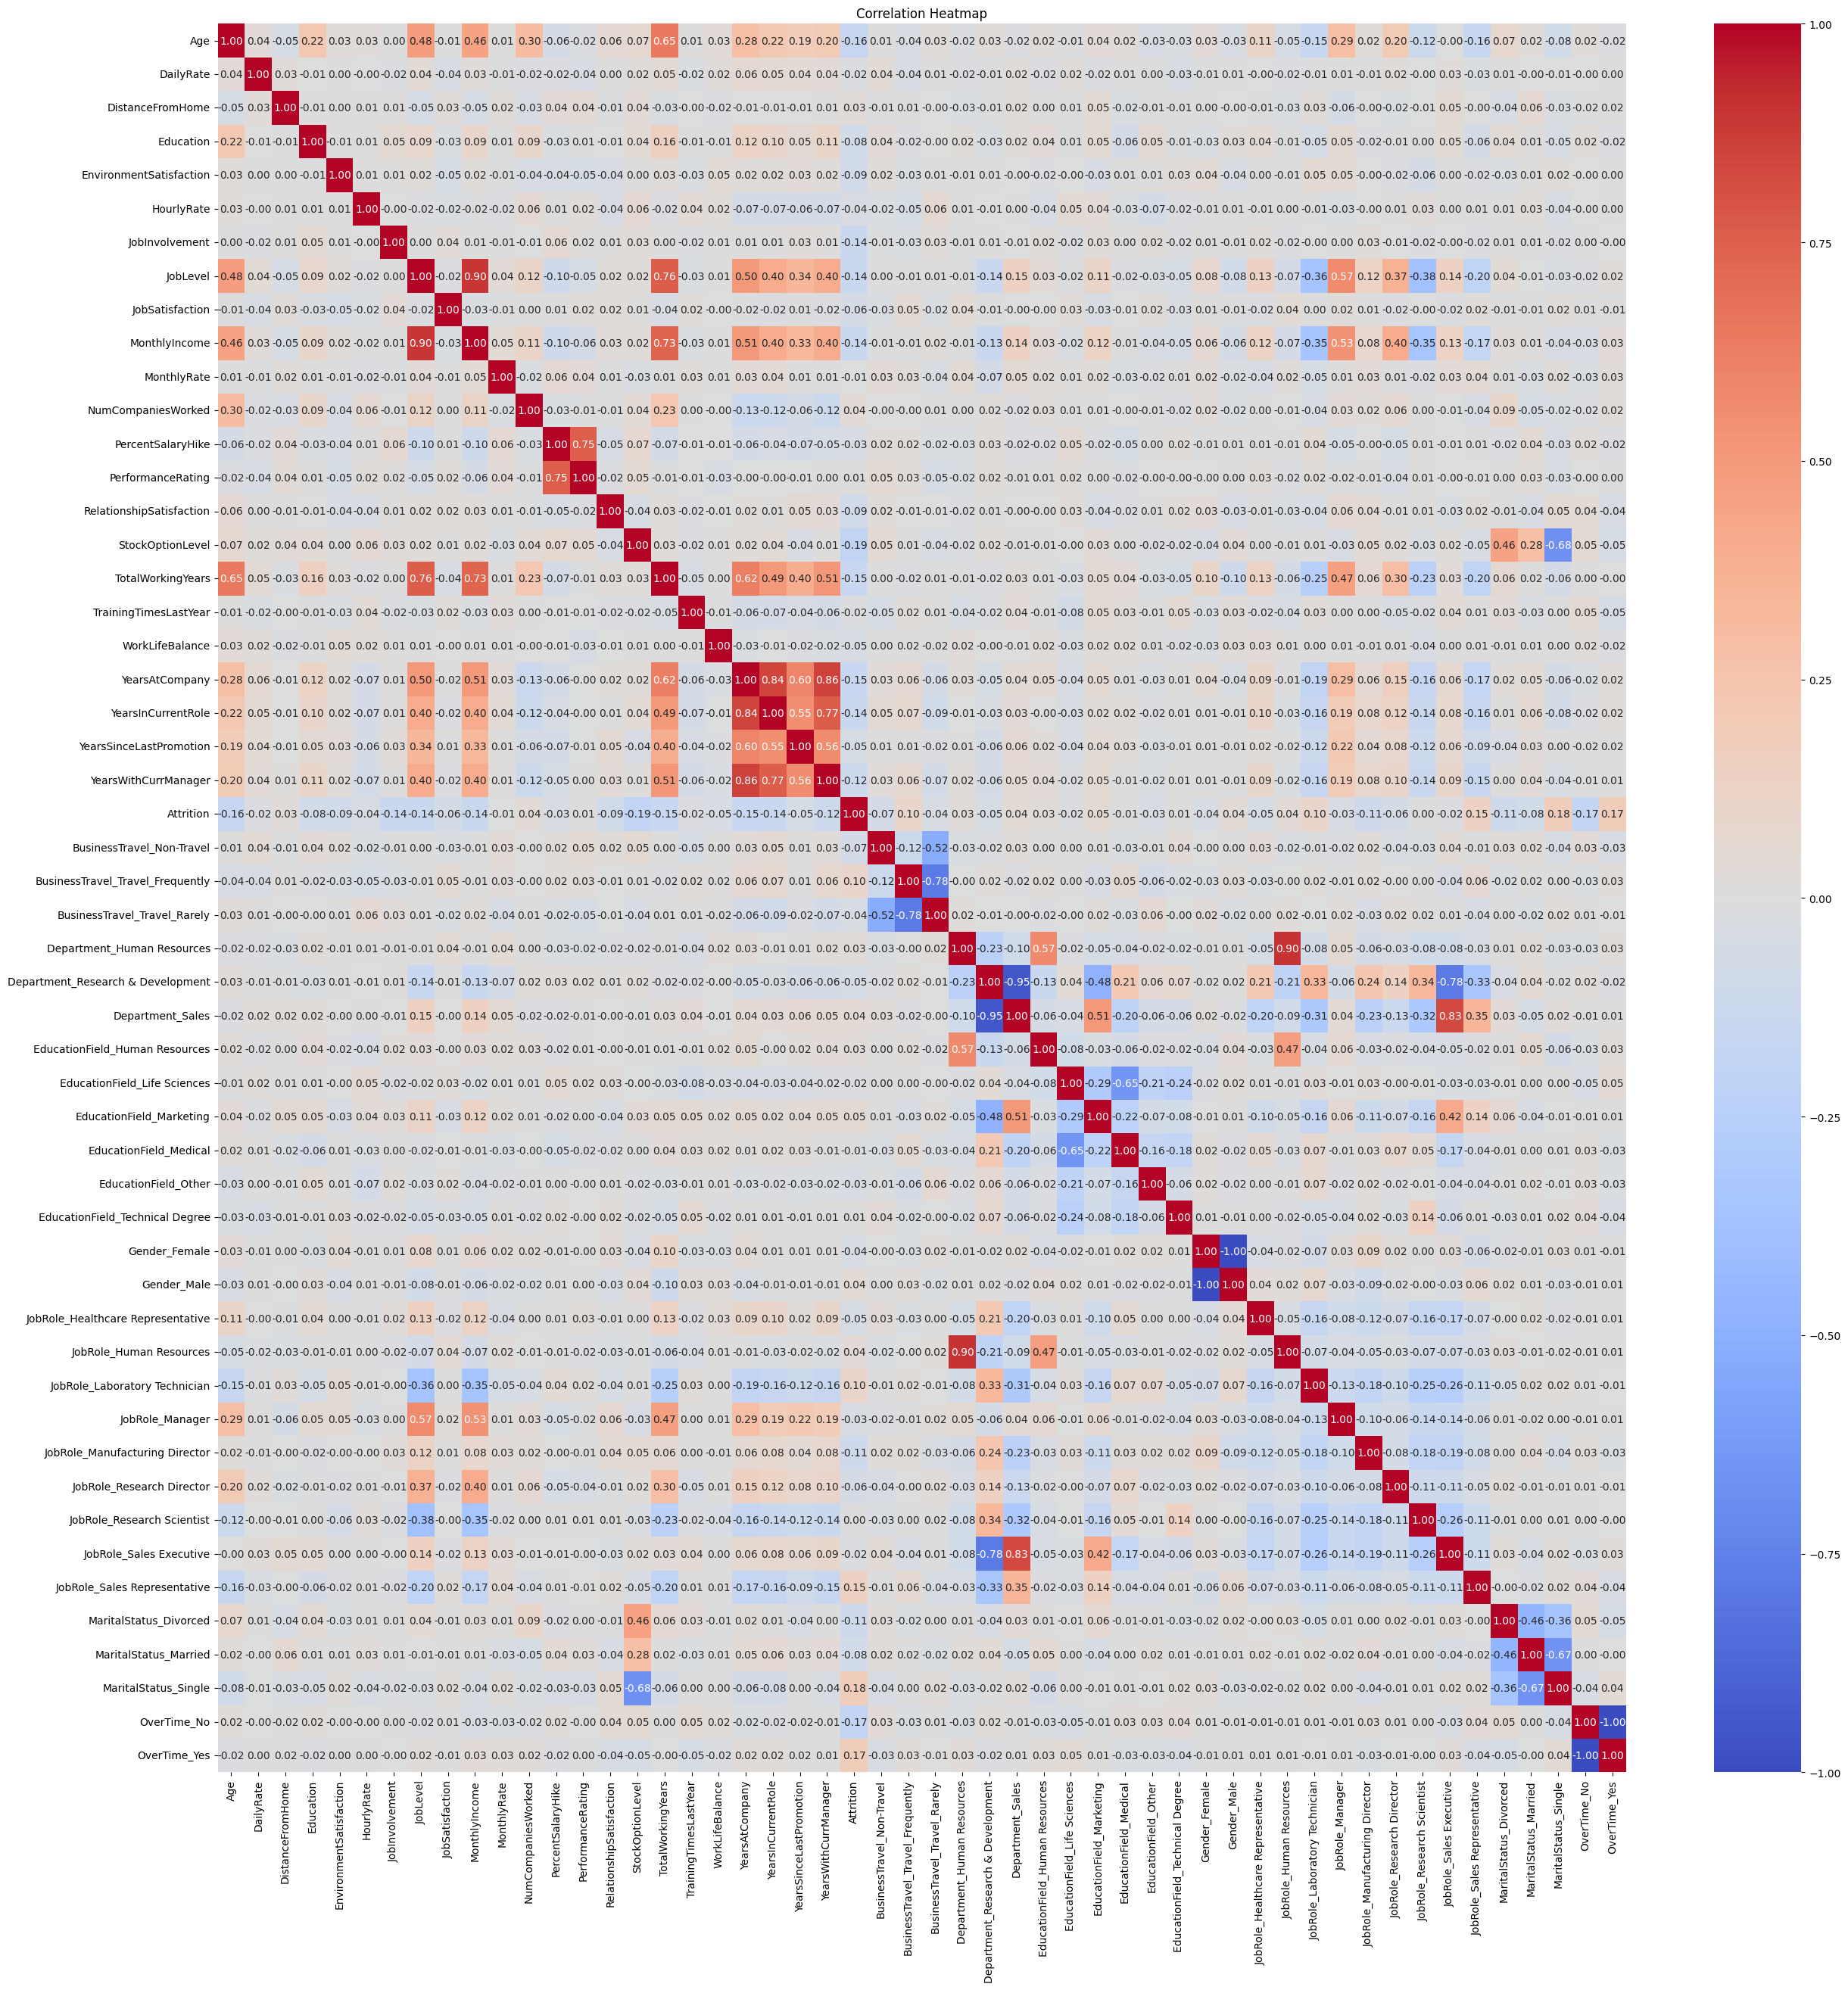

In [183]:
# Plotting a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [184]:
#Drop target variable
X_numeric=data.drop(["Attrition"], axis=1)
X_numeric.dtypes

Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                             object
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                        float64
MonthlyRate                            int64
NumCompaniesWorked                     int64
PercentSalaryHike                    float64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                       float64
YearsInCurrentRole                   float64
YearsSinceLastPromotion              float64
YearsWithC

In [185]:
X_numeric['Education'] = pd.to_numeric(X_numeric['Education'], errors='coerce')

In [186]:
# Assuming X_numeric contains only numeric columns
numeric_columns = X_numeric.select_dtypes(include=np.number).columns

# Check for and handle zero or negative values
non_positive_values = (X_numeric <= 0).any()

if non_positive_values.any():
    # If there are zero or negative values, add a small constant to avoid undefined log
    X_numeric.loc[:, non_positive_values] += 1e-6  # Use loc to ensure correct alignment

# Log transformation
X_log_transformed = np.log1p(X_numeric)
X_numeric = X_log_transformed

In [187]:
X_numeric.dtypes

Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsInCurrentRole                   float64
YearsSinceLastPromotion              float64
YearsWithC

In [188]:
# Using VIF scores for quantifying multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Define a function for displaying vif values
def vif_function(X_numeric, column): 
    X_numeric= X_numeric.drop([column], axis=1)
    # Remove NaN or infinite values
    X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
    X_numeric = X_numeric.dropna()  # Drop rows with NaN values

    # Calculate VIF for numeric columns
    vif_data = pd.DataFrame()
    vif_data["Variables"] = X_numeric.columns
    vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

    # Sort by "VIF" column in descending order
    sorted_vif_data = vif_data.sort_values(by="VIF", ascending=False)

    # Print the sorted DataFrame
    print(sorted_vif_data)
    return(X_numeric)

In [189]:
# Drop the columns 'Gender_Male'
X_numeric= vif_function(X_numeric, 'Gender_Male')

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Variables       VIF
25       BusinessTravel_Travel_Rarely       inf
24   BusinessTravel_Travel_Frequently       inf
27  Department_Research & Development       inf
28                   Department_Sales       inf
29     EducationField_Human Resources       inf
30       EducationField_Life Sciences       inf
31           EducationField_Marketing       inf
32             EducationField_Medical       inf
33               EducationField_Other       inf
34    EducationField_Technical Degree       inf
36  JobRole_Healthcare Representative       inf
37            JobRole_Human Resources       inf
38      JobRole_Laboratory Technician       inf
39                    JobRole_Manager       inf
40     JobRole_Manufacturing Director       inf
41          JobRole_Research Director       inf
42         JobRole_Research Scientist       inf
43            JobRole_Sales Executive       inf
44       JobRole_Sales Representative       inf
45             MaritalStatus_Divorced   

In [190]:
# Drop the columns 'OverTime_No'
X_numeric= vif_function(X_numeric, 'OverTime_No')

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Variables       VIF
24   BusinessTravel_Travel_Frequently       inf
33               EducationField_Other       inf
31           EducationField_Marketing       inf
30       EducationField_Life Sciences       inf
29     EducationField_Human Resources       inf
28                   Department_Sales       inf
27  Department_Research & Development       inf
26         Department_Human Resources       inf
25       BusinessTravel_Travel_Rarely       inf
34    EducationField_Technical Degree       inf
23          BusinessTravel_Non-Travel       inf
36  JobRole_Healthcare Representative       inf
37            JobRole_Human Resources       inf
38      JobRole_Laboratory Technician       inf
32             EducationField_Medical       inf
45             MaritalStatus_Divorced       inf
47               MaritalStatus_Single       inf
46              MaritalStatus_Married       inf
40     JobRole_Manufacturing Director       inf
41          JobRole_Research Director   

In [191]:
# Drop the columns 'BusinessTravel_Travel_Rarely'
X_numeric= vif_function(X_numeric, 'BusinessTravel_Travel_Rarely')

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Variables       VIF
39     JobRole_Manufacturing Director       inf
40          JobRole_Research Director       inf
32               EducationField_Other       inf
31             EducationField_Medical       inf
30           EducationField_Marketing       inf
29       EducationField_Life Sciences       inf
28     EducationField_Human Resources       inf
27                   Department_Sales       inf
26  Department_Research & Development       inf
25         Department_Human Resources       inf
36            JobRole_Human Resources       inf
37      JobRole_Laboratory Technician       inf
38                    JobRole_Manager       inf
35  JobRole_Healthcare Representative       inf
33    EducationField_Technical Degree       inf
41         JobRole_Research Scientist       inf
46               MaritalStatus_Single       inf
45              MaritalStatus_Married       inf
44             MaritalStatus_Divorced       inf
43       JobRole_Sales Representative   

In [192]:
# Drop the columns 'Department_Sales'
X_numeric= vif_function(X_numeric, 'Department_Sales')

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Variables        VIF
38     JobRole_Manufacturing Director        inf
39          JobRole_Research Director        inf
32    EducationField_Technical Degree        inf
31               EducationField_Other        inf
30             EducationField_Medical        inf
29           EducationField_Marketing        inf
28       EducationField_Life Sciences        inf
27     EducationField_Human Resources        inf
36      JobRole_Laboratory Technician        inf
37                    JobRole_Manager        inf
35            JobRole_Human Resources        inf
34  JobRole_Healthcare Representative        inf
41            JobRole_Sales Executive        inf
45               MaritalStatus_Single        inf
40         JobRole_Research Scientist        inf
44              MaritalStatus_Married        inf
43             MaritalStatus_Divorced        inf
42       JobRole_Sales Representative        inf
26  Department_Research & Development  15.400351
25         Departmen

In [193]:
# Drop the columns 'MaritalStatus_Single'
X_numeric= vif_function(X_numeric, 'MaritalStatus_Single')

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Variables        VIF
37                    JobRole_Manager        inf
39          JobRole_Research Director        inf
29           EducationField_Marketing        inf
35            JobRole_Human Resources        inf
30             EducationField_Medical        inf
36      JobRole_Laboratory Technician        inf
34  JobRole_Healthcare Representative        inf
28       EducationField_Life Sciences        inf
31               EducationField_Other        inf
38     JobRole_Manufacturing Director        inf
27     EducationField_Human Resources        inf
41            JobRole_Sales Executive        inf
32    EducationField_Technical Degree        inf
40         JobRole_Research Scientist        inf
42       JobRole_Sales Representative        inf
26  Department_Research & Development  15.400351
25         Department_Human Resources   7.620257
19                     YearsAtCompany   7.123837
7                            JobLevel   7.086761
9                   

In [194]:
# Drop the columns 'JobRole_Sales Executive'
X_numeric= vif_function(X_numeric, 'JobRole_Sales Executive')

                            Variables          VIF
28       EducationField_Life Sciences  1005.249496
30             EducationField_Medical   711.311934
29           EducationField_Marketing   199.640960
32    EducationField_Technical Degree   138.307260
31               EducationField_Other   106.664030
27     EducationField_Human Resources    18.683504
26  Department_Research & Development    15.400351
40         JobRole_Research Scientist    13.986595
36      JobRole_Laboratory Technician    13.558817
38     JobRole_Manufacturing Director     8.597662
25         Department_Human Resources     7.620257
34  JobRole_Healthcare Representative     7.145402
19                     YearsAtCompany     7.123837
7                            JobLevel     7.086761
35            JobRole_Human Resources     6.691139
9                       MonthlyIncome     4.660604
22               YearsWithCurrManager     4.376638
39          JobRole_Research Director     4.261053
20                 YearsInCurre

In [195]:
# Drop the columns 'EducationField_Life Sciences'
X_numeric= vif_function(X_numeric, 'EducationField_Life Sciences')

                            Variables         VIF
13                  PerformanceRating  655.778203
9                       MonthlyIncome  617.664606
0                                 Age  425.953022
12                  PercentSalaryHike  380.718509
10                        MonthlyRate  218.725903
5                          HourlyRate  177.290659
1                           DailyRate  146.053036
7                            JobLevel   75.009177
26  Department_Research & Development   50.636786
19                     YearsAtCompany   49.587090
18                    WorkLifeBalance   47.681028
6                      JobInvolvement   47.132547
16                  TotalWorkingYears   45.292470
3                           Education   24.711031
39         JobRole_Research Scientist   17.435990
22               YearsWithCurrManager   16.937615
14           RelationshipSatisfaction   16.894770
35      JobRole_Laboratory Technician   16.744672
4             EnvironmentSatisfaction   16.656053


In [196]:
# Drop the columns 'PerformanceRating'
X_numeric= vif_function(X_numeric, 'PerformanceRating')

                            Variables         VIF
9                       MonthlyIncome  600.772185
0                                 Age  418.870448
10                        MonthlyRate  215.509962
5                          HourlyRate  174.731701
12                  PercentSalaryHike  170.355571
1                           DailyRate  145.730068
7                            JobLevel   74.764829
25  Department_Research & Development   50.635039
18                     YearsAtCompany   49.546190
17                    WorkLifeBalance   47.678002
6                      JobInvolvement   47.132112
15                  TotalWorkingYears   45.144517
3                           Education   24.662812
38         JobRole_Research Scientist   17.421091
21               YearsWithCurrManager   16.935887
13           RelationshipSatisfaction   16.860072
34      JobRole_Laboratory Technician   16.730674
4             EnvironmentSatisfaction   16.654857
8                     JobSatisfaction   16.342224


In [197]:
# Drop the columns 'MonthlyIncome'
X_numeric= vif_function(X_numeric, 'MonthlyIncome')

                            Variables         VIF
0                                 Age  381.576518
9                         MonthlyRate  200.978673
5                          HourlyRate  166.750699
11                  PercentSalaryHike  163.632097
1                           DailyRate  140.965975
7                            JobLevel   55.159641
24  Department_Research & Development   50.588327
17                     YearsAtCompany   49.161522
16                    WorkLifeBalance   47.299246
6                      JobInvolvement   46.619809
14                  TotalWorkingYears   44.901965
3                           Education   24.653423
37         JobRole_Research Scientist   17.388942
20               YearsWithCurrManager   16.926675
12           RelationshipSatisfaction   16.737085
33      JobRole_Laboratory Technician   16.692786
4             EnvironmentSatisfaction   16.568593
8                     JobSatisfaction   16.249022
18                 YearsInCurrentRole   16.212964


In [198]:
# Drop the columns 'Age'
X_numeric= vif_function(X_numeric, 'Age')

                            Variables         VIF
8                         MonthlyRate  187.332609
10                  PercentSalaryHike  157.651351
4                          HourlyRate  156.974971
0                           DailyRate  135.085032
6                            JobLevel   54.290548
23  Department_Research & Development   50.546910
16                     YearsAtCompany   49.145505
15                    WorkLifeBalance   46.635303
5                      JobInvolvement   46.392349
13                  TotalWorkingYears   37.935422
2                           Education   23.428580
36         JobRole_Research Scientist   17.362463
19               YearsWithCurrManager   16.809276
32      JobRole_Laboratory Technician   16.671075
11           RelationshipSatisfaction   16.437385
3             EnvironmentSatisfaction   16.413797
17                 YearsInCurrentRole   16.206378
7                     JobSatisfaction   16.088587
14              TrainingTimesLastYear   15.095977


In [199]:
# Drop the columns 'MonthlyRate'
X_numeric= vif_function(X_numeric, 'MonthlyRate')

                            Variables         VIF
4                          HourlyRate  148.744228
9                   PercentSalaryHike  141.699462
0                           DailyRate  128.410535
6                            JobLevel   53.007434
22  Department_Research & Development   50.524688
15                     YearsAtCompany   49.100731
14                    WorkLifeBalance   46.141860
5                      JobInvolvement   45.998441
12                  TotalWorkingYears   37.865744
2                           Education   23.282205
35         JobRole_Research Scientist   17.292428
18               YearsWithCurrManager   16.800372
31      JobRole_Laboratory Technician   16.616986
3             EnvironmentSatisfaction   16.355381
10           RelationshipSatisfaction   16.282244
16                 YearsInCurrentRole   16.199758
7                     JobSatisfaction   16.017314
13              TrainingTimesLastYear   14.982563
33     JobRole_Manufacturing Director    9.712974


In [200]:
# Drop the columns 'HourlyRate'
X_numeric= vif_function(X_numeric, 'HourlyRate')

                            Variables         VIF
8                   PercentSalaryHike  125.153624
0                           DailyRate  118.731483
5                            JobLevel   51.830733
21  Department_Research & Development   50.524677
14                     YearsAtCompany   49.075643
4                      JobInvolvement   45.406971
13                    WorkLifeBalance   45.210548
11                  TotalWorkingYears   37.855023
2                           Education   23.050983
34         JobRole_Research Scientist   17.203713
17               YearsWithCurrManager   16.793036
30      JobRole_Laboratory Technician   16.559550
9            RelationshipSatisfaction   16.198932
15                 YearsInCurrentRole   16.192575
3             EnvironmentSatisfaction   16.177986
6                     JobSatisfaction   15.947530
12              TrainingTimesLastYear   14.806381
32     JobRole_Manufacturing Director    9.708996
28  JobRole_Healthcare Representative    7.861892


In [201]:
# Drop the columns 'PercentSalaryHike'
X_numeric= vif_function(X_numeric, 'PercentSalaryHike')

                            Variables        VIF
0                           DailyRate  97.750575
5                            JobLevel  50.897476
20  Department_Research & Development  50.495146
13                     YearsAtCompany  49.070985
12                    WorkLifeBalance  43.669918
4                      JobInvolvement  42.500304
10                  TotalWorkingYears  37.837421
2                           Education  22.790831
33         JobRole_Research Scientist  17.166854
16               YearsWithCurrManager  16.791762
29      JobRole_Laboratory Technician  16.517192
14                 YearsInCurrentRole  16.187839
3             EnvironmentSatisfaction  16.067504
8            RelationshipSatisfaction  16.061396
6                     JobSatisfaction  15.661753
11              TrainingTimesLastYear  14.611445
31     JobRole_Manufacturing Director   9.708846
27  JobRole_Healthcare Representative   7.861875
19         Department_Human Resources   7.771242
28            JobRol

In [202]:
# Drop the columns 'DailyRate'
X_numeric= vif_function(X_numeric, 'DailyRate')

                            Variables        VIF
19  Department_Research & Development  50.467183
12                     YearsAtCompany  48.443598
4                            JobLevel  47.299593
3                      JobInvolvement  39.646478
11                    WorkLifeBalance  39.532936
9                   TotalWorkingYears  37.836799
1                           Education  22.307224
32         JobRole_Research Scientist  16.876461
15               YearsWithCurrManager  16.738932
28      JobRole_Laboratory Technician  16.277757
13                 YearsInCurrentRole  16.160800
2             EnvironmentSatisfaction  15.610034
7            RelationshipSatisfaction  15.546389
5                     JobSatisfaction  15.378584
10              TrainingTimesLastYear  14.208340
30     JobRole_Manufacturing Director   9.696424
26  JobRole_Healthcare Representative   7.858251
18         Department_Human Resources   7.767335
27            JobRole_Human Resources   6.734308
0                   

In [203]:
# Drop the columns 'Department_Research & Development'
X_numeric= vif_function(X_numeric, 'Department_Research & Development')

                            Variables        VIF
12                     YearsAtCompany  48.436762
4                            JobLevel  47.277896
3                      JobInvolvement  39.646363
11                    WorkLifeBalance  39.475339
9                   TotalWorkingYears  37.835885
1                           Education  22.305889
15               YearsWithCurrManager  16.734673
13                 YearsInCurrentRole  16.142144
2             EnvironmentSatisfaction  15.606034
7            RelationshipSatisfaction  15.546385
5                     JobSatisfaction  15.365219
10              TrainingTimesLastYear  14.203904
18         Department_Human Resources   6.964056
0                    DistanceFromHome   6.263179
26            JobRole_Human Resources   6.086517
8                    StockOptionLevel   5.796721
34              MaritalStatus_Married   5.024047
6                  NumCompaniesWorked   4.689469
33             MaritalStatus_Divorced   3.761563
31         JobRole_R

In [204]:
# Drop the columns 'YearsAtCompany'
X_numeric= vif_function(X_numeric, 'YearsAtCompany')

                            Variables        VIF
4                            JobLevel  47.023746
3                      JobInvolvement  39.473831
11                    WorkLifeBalance  39.441925
9                   TotalWorkingYears  35.691277
1                           Education  22.283628
2             EnvironmentSatisfaction  15.603959
7            RelationshipSatisfaction  15.546369
5                     JobSatisfaction  15.350608
10              TrainingTimesLastYear  14.202216
14               YearsWithCurrManager  12.177801
12                 YearsInCurrentRole  11.840791
17         Department_Human Resources   6.962839
0                    DistanceFromHome   6.261662
25            JobRole_Human Resources   6.086089
8                    StockOptionLevel   5.794055
33              MaritalStatus_Married   5.022327
6                  NumCompaniesWorked   4.434594
32             MaritalStatus_Divorced   3.756688
30         JobRole_Research Scientist   3.134285
26      JobRole_Labo

In [205]:
# Drop the columns 'JobLevel'
X_numeric= vif_function(X_numeric, 'JobLevel')

                            Variables        VIF
3                      JobInvolvement  38.208303
10                    WorkLifeBalance  37.755847
8                   TotalWorkingYears  30.190484
1                           Education  21.988617
2             EnvironmentSatisfaction  15.457889
6            RelationshipSatisfaction  15.445352
4                     JobSatisfaction  15.159936
9               TrainingTimesLastYear  14.018045
13               YearsWithCurrManager  12.177782
11                 YearsInCurrentRole  11.838993
16         Department_Human Resources   6.953758
0                    DistanceFromHome   6.241493
24            JobRole_Human Resources   6.074684
7                    StockOptionLevel   5.793781
32              MaritalStatus_Married   5.021332
5                  NumCompaniesWorked   4.432450
31             MaritalStatus_Divorced   3.756261
12            YearsSinceLastPromotion   2.882099
29         JobRole_Research Scientist   2.404177
25      JobRole_Labo

In [206]:
# Drop the columns 'JobInvolvement'
X_numeric= vif_function(X_numeric, 'JobInvolvement')

                            Variables        VIF
9                     WorkLifeBalance  35.219344
7                   TotalWorkingYears  29.971337
1                           Education  21.125207
2             EnvironmentSatisfaction  15.003956
5            RelationshipSatisfaction  14.989973
3                     JobSatisfaction  14.644090
8               TrainingTimesLastYear  13.797355
12               YearsWithCurrManager  12.177084
10                 YearsInCurrentRole  11.838834
15         Department_Human Resources   6.949691
0                    DistanceFromHome   6.199910
23            JobRole_Human Resources   6.066769
6                    StockOptionLevel   5.793678
31              MaritalStatus_Married   5.017344
4                  NumCompaniesWorked   4.430850
30             MaritalStatus_Divorced   3.754541
11            YearsSinceLastPromotion   2.881730
28         JobRole_Research Scientist   2.371091
24      JobRole_Laboratory Technician   2.350057
18             Educa

In [207]:
# Drop the columns 'WorkLifeBalance'
X_numeric= vif_function(X_numeric, 'WorkLifeBalance')

                            Variables        VIF
7                   TotalWorkingYears  29.183146
1                           Education  20.262004
5            RelationshipSatisfaction  14.302410
3                     JobSatisfaction  13.913041
2             EnvironmentSatisfaction  13.877980
8               TrainingTimesLastYear  13.252989
11               YearsWithCurrManager  12.147610
9                  YearsInCurrentRole  11.811013
14         Department_Human Resources   6.948879
0                    DistanceFromHome   6.130943
22            JobRole_Human Resources   6.063249
6                    StockOptionLevel   5.791310
30              MaritalStatus_Married   5.016293
4                  NumCompaniesWorked   4.430683
29             MaritalStatus_Divorced   3.754518
10            YearsSinceLastPromotion   2.878046
27         JobRole_Research Scientist   2.325763
23      JobRole_Laboratory Technician   2.298758
17             EducationField_Medical   1.754904
25     JobRole_Manuf

In [208]:
# Drop the columns 'TotalWorkingYears'
X_numeric= vif_function(X_numeric, 'TotalWorkingYears')

                            Variables        VIF
1                           Education  18.878970
5            RelationshipSatisfaction  14.153140
3                     JobSatisfaction  13.821711
2             EnvironmentSatisfaction  13.676976
7               TrainingTimesLastYear  13.126519
8                  YearsInCurrentRole  11.375365
10               YearsWithCurrManager  11.270347
13         Department_Human Resources   6.947550
0                    DistanceFromHome   6.106443
21            JobRole_Human Resources   6.063121
6                    StockOptionLevel   5.785833
29              MaritalStatus_Married   4.983908
28             MaritalStatus_Divorced   3.735368
4                  NumCompaniesWorked   3.572989
9             YearsSinceLastPromotion   2.871280
26         JobRole_Research Scientist   2.280181
22      JobRole_Laboratory Technician   2.260378
16             EducationField_Medical   1.748414
24     JobRole_Manufacturing Director   1.730176
19                  

In [209]:
# Drop the columns 'Education'
X_numeric= vif_function(X_numeric, 'Education')

                            Variables        VIF
4            RelationshipSatisfaction  13.482337
2                     JobSatisfaction  13.444538
1             EnvironmentSatisfaction  12.953818
6               TrainingTimesLastYear  12.595875
7                  YearsInCurrentRole  11.351908
9                YearsWithCurrManager  11.164441
12         Department_Human Resources   6.935108
20            JobRole_Human Resources   6.059386
0                    DistanceFromHome   6.051429
5                    StockOptionLevel   5.785806
28              MaritalStatus_Married   4.970790
27             MaritalStatus_Divorced   3.728181
3                  NumCompaniesWorked   3.455818
8             YearsSinceLastPromotion   2.869447
21      JobRole_Laboratory Technician   2.247277
25         JobRole_Research Scientist   2.246935
15             EducationField_Medical   1.748361
23     JobRole_Manufacturing Director   1.727475
18                      Gender_Female   1.613687
19  JobRole_Healthca

In [210]:
# Drop the columns 'RelationshipSatisfaction'
X_numeric= vif_function(X_numeric, 'RelationshipSatisfaction')

                            Variables        VIF
2                     JobSatisfaction  12.703903
1             EnvironmentSatisfaction  12.319242
5               TrainingTimesLastYear  11.946369
6                  YearsInCurrentRole  11.343580
8                YearsWithCurrManager  11.124282
11         Department_Human Resources   6.935106
19            JobRole_Human Resources   6.057159
0                    DistanceFromHome   5.972565
4                    StockOptionLevel   5.784832
27              MaritalStatus_Married   4.969223
26             MaritalStatus_Divorced   3.726308
3                  NumCompaniesWorked   3.427204
7             YearsSinceLastPromotion   2.866633
20      JobRole_Laboratory Technician   2.223502
24         JobRole_Research Scientist   2.198070
14             EducationField_Medical   1.748361
22     JobRole_Manufacturing Director   1.705706
17                      Gender_Female   1.607215
12     EducationField_Human Resources   1.551422
18  JobRole_Healthca

In [211]:
# Drop the columns 'JobSatisfaction'
X_numeric= vif_function(X_numeric, 'JobSatisfaction')

                            Variables        VIF
1             EnvironmentSatisfaction  11.519244
5                  YearsInCurrentRole  11.329218
7                YearsWithCurrManager  11.105651
4               TrainingTimesLastYear  10.785950
10         Department_Human Resources   6.932560
18            JobRole_Human Resources   6.046124
0                    DistanceFromHome   5.776603
3                    StockOptionLevel   5.768484
26              MaritalStatus_Married   4.969221
25             MaritalStatus_Divorced   3.725445
2                  NumCompaniesWorked   3.373461
6             YearsSinceLastPromotion   2.861865
19      JobRole_Laboratory Technician   2.172757
23         JobRole_Research Scientist   2.126590
13             EducationField_Medical   1.748031
21     JobRole_Manufacturing Director   1.681683
16                      Gender_Female   1.601896
11     EducationField_Human Resources   1.549265
17  JobRole_Healthcare Representative   1.533526
12           Educati

In [212]:
# Drop the columns 'EnvironmentSatisfaction'
X_numeric= vif_function(X_numeric, 'EnvironmentSatisfaction')

                            Variables        VIF
4                  YearsInCurrentRole  11.297351
6                YearsWithCurrManager  11.010432
3               TrainingTimesLastYear   9.221252
9          Department_Human Resources   6.931212
17            JobRole_Human Resources   6.023245
2                    StockOptionLevel   5.762247
0                    DistanceFromHome   5.529405
25              MaritalStatus_Married   4.961577
24             MaritalStatus_Divorced   3.725261
1                  NumCompaniesWorked   3.288965
5             YearsSinceLastPromotion   2.859001
22         JobRole_Research Scientist   2.064023
18      JobRole_Laboratory Technician   2.053918
12             EducationField_Medical   1.743350
20     JobRole_Manufacturing Director   1.655333
15                      Gender_Female   1.579790
10     EducationField_Human Resources   1.548529
16  JobRole_Healthcare Representative   1.504489
11           EducationField_Marketing   1.446926
19                  

In [213]:
# Drop the columns 'YearsInCurrentRole'
X_numeric= vif_function(X_numeric, 'YearsInCurrentRole')

                            Variables       VIF
3               TrainingTimesLastYear  9.179076
8          Department_Human Resources  6.929500
16            JobRole_Human Resources  6.017311
2                    StockOptionLevel  5.757312
0                    DistanceFromHome  5.527637
5                YearsWithCurrManager  5.234985
24              MaritalStatus_Married  4.952017
23             MaritalStatus_Divorced  3.719299
1                  NumCompaniesWorked  3.287909
4             YearsSinceLastPromotion  2.730072
21         JobRole_Research Scientist  2.064016
17      JobRole_Laboratory Technician  2.053594
11             EducationField_Medical  1.737178
19     JobRole_Manufacturing Director  1.654034
14                      Gender_Female  1.579182
9      EducationField_Human Resources  1.547161
15  JobRole_Healthcare Representative  1.498322
10           EducationField_Marketing  1.446587
18                    JobRole_Manager  1.394602
25                       OverTime_Yes  1

In [214]:
# Drop the columns 'TrainingTimesLastYear'
X_numeric= vif_function(X_numeric, 'TrainingTimesLastYear')

                            Variables       VIF
7          Department_Human Resources  6.929228
15            JobRole_Human Resources  6.002613
2                    StockOptionLevel  5.751688
4                YearsWithCurrManager  4.984977
0                    DistanceFromHome  4.885014
23              MaritalStatus_Married  4.872401
22             MaritalStatus_Divorced  3.661599
1                  NumCompaniesWorked  3.061273
3             YearsSinceLastPromotion  2.728275
20         JobRole_Research Scientist  1.932203
16      JobRole_Laboratory Technician  1.871769
10             EducationField_Medical  1.706477
18     JobRole_Manufacturing Director  1.604724
13                      Gender_Female  1.564730
8      EducationField_Human Resources  1.547113
14  JobRole_Healthcare Representative  1.456705
9            EducationField_Marketing  1.390209
17                    JobRole_Manager  1.370781
24                       OverTime_Yes  1.307673
19          JobRole_Research Director  1

In [215]:
# Drop the columns 'Department_Human Resources'
X_numeric= vif_function(X_numeric, 'Department_Human Resources')

                            Variables       VIF
2                    StockOptionLevel  5.745928
4                YearsWithCurrManager  4.983739
0                    DistanceFromHome  4.884268
22              MaritalStatus_Married  4.865244
21             MaritalStatus_Divorced  3.660449
1                  NumCompaniesWorked  3.060988
3             YearsSinceLastPromotion  2.728272
19         JobRole_Research Scientist  1.931844
15      JobRole_Laboratory Technician  1.871608
9              EducationField_Medical  1.705653
17     JobRole_Manufacturing Director  1.604393
12                      Gender_Female  1.563227
13  JobRole_Healthcare Representative  1.456516
8            EducationField_Marketing  1.388302
14            JobRole_Human Resources  1.367761
16                    JobRole_Manager  1.334875
7      EducationField_Human Resources  1.325341
23                       OverTime_Yes  1.306805
18          JobRole_Research Director  1.244096
6    BusinessTravel_Travel_Frequently  1

In [216]:
# Drop the columns 'StockOptionLevel'
X_numeric= vif_function(X_numeric, 'StockOptionLevel')

                            Variables       VIF
3                YearsWithCurrManager  4.982871
0                    DistanceFromHome  4.874265
1                  NumCompaniesWorked  3.060649
2             YearsSinceLastPromotion  2.727275
21              MaritalStatus_Married  2.249243
18         JobRole_Research Scientist  1.929900
14      JobRole_Laboratory Technician  1.870866
8              EducationField_Medical  1.705540
16     JobRole_Manufacturing Director  1.604029
11                      Gender_Female  1.562721
20             MaritalStatus_Divorced  1.540879
12  JobRole_Healthcare Representative  1.456482
7            EducationField_Marketing  1.387429
13            JobRole_Human Resources  1.367354
15                    JobRole_Manager  1.333574
6      EducationField_Human Resources  1.320113
22                       OverTime_Yes  1.306473
17          JobRole_Research Director  1.243811
5    BusinessTravel_Travel_Frequently  1.225449
10    EducationField_Technical Degree  1

In [217]:
X_numeric.columns

Index(['DistanceFromHome', 'NumCompaniesWorked', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'EducationField_Human Resources',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'OverTime_Yes'],
      dtype='object')

In [218]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = X_numeric  # Features
y = data['Attrition']  # Target variable

# Test and Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1341, 23)
(336, 23)
(1341,)
(336,)


In [219]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model_initial = LogisticRegression(random_state=42)

# Fit the model using the training data
logistic_model_initial.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [220]:
# Predict the variables for X_test dataset
log_reg_predictions_initial= logistic_model_initial.predict(X_test)
log_reg_predictions_initial

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [221]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Scoring using accuracy
log_reg_accuracy_initial = accuracy_score(y_test, log_reg_predictions_initial)
print(f'Accuracy: {log_reg_accuracy_initial:.4f}')

Accuracy: 0.8839


In [222]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, log_reg_predictions_initial))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       296
           1       0.60      0.07      0.13        40

    accuracy                           0.88       336
   macro avg       0.74      0.53      0.54       336
weighted avg       0.85      0.88      0.84       336



In [223]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, log_reg_predictions_initial))

Confusion Matrix:
[[294   2]
 [ 37   3]]


In [224]:
# ROC AUC score (if it's a binary classification)
if len(set(y_test)) == 2:  # Checking for binary classification
    log_reg_roc_auc_initial = roc_auc_score(y_test, logistic_model_initial.predict_proba(X_test)[:, 1])
    print(f'ROC AUC Score: {log_reg_roc_auc_initial:.4f}')

ROC AUC Score: 0.7246


In [225]:
# Finding best combination of hyperparameters for Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [10, 50, 100, 500, 1000, 1500, 2000, 3000]
}

# Create a Logistic Regression
log_regression = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set using the best parameters
best_tree = grid_search.best_estimator_
test_accuracy = best_tree.score(X_test, y_test)
print("Test Set Accuracy with Best Parameters:", test_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

Best Parameters: {'C': 10, 'max_iter': 10, 'solver': 'saga'}
Best Score: 0.8866587138656161
Test Set Accuracy with Best Parameters: 0.8779761904761905


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [226]:
# Initialize Logistic Regression model with best parameters
logistic_model_hyp = LogisticRegression(C=10, max_iter= 10, solver= 'saga')

# Fit the model using the training data
logistic_model_hyp.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=10, solver='saga')

In [227]:
# Predict the variables for X_test dataset
log_reg_predictions_hyp= logistic_model_hyp.predict(X_test)
log_reg_predictions_hyp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [228]:
# Scoring using accuracy
log_reg_accuracy_hyp = accuracy_score(y_test, log_reg_predictions_hyp)
print(f'Accuracy: {log_reg_accuracy_hyp:.4f}')

Accuracy: 0.8780


In [229]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, log_reg_predictions_hyp))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       296
           1       0.43      0.07      0.13        40

    accuracy                           0.88       336
   macro avg       0.66      0.53      0.53       336
weighted avg       0.83      0.88      0.84       336



In [230]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, log_reg_predictions_hyp))

Confusion Matrix:
[[292   4]
 [ 37   3]]


In [231]:
# ROC AUC score (if it's a binary classification)
if len(set(y_test)) == 2:  # Checking for binary classification
    log_reg_roc_auc_hyp = roc_auc_score(y_test, logistic_model_hyp.predict_proba(X_test)[:, 1])
    print(f'ROC AUC Score: {log_reg_roc_auc_hyp:.4f}')

ROC AUC Score: 0.7253


In [232]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X_t = data.drop(['Attrition'], axis = 1) #Features
y_t = data['Attrition']  # Target variable

# Test and Train Split
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42, stratify=y)

print(X_t_train.shape)
print(X_t_test.shape)
print(y_t_train.shape)
print(y_t_test.shape)

(1341, 51)
(336, 51)
(1341,)
(336,)


In [233]:
# Trying a Decision Tree Model instead
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier model
decision_tree_model_initial = DecisionTreeClassifier(random_state=42)

# Fit the model using the training data
decision_tree_model_initial.fit(X_t_train, y_t_train)

DecisionTreeClassifier(random_state=42)

In [234]:
# Predict the variables for X_test dataset
dec_tree_predictions_initial= decision_tree_model_initial.predict(X_t_test)
dec_tree_predictions_initial

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [235]:
# Scoring using accuracy
dec_tree_accuracy_initial = accuracy_score(y_t_test, dec_tree_predictions_initial)
print(f'Accuracy: {dec_tree_accuracy_initial:.4f}')

Accuracy: 0.8185


In [236]:
# Classification report
print('Classification Report:')
print(classification_report(y_t_test, dec_tree_predictions_initial))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       296
           1       0.29      0.35      0.31        40

    accuracy                           0.82       336
   macro avg       0.60      0.62      0.60       336
weighted avg       0.84      0.82      0.83       336



In [237]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_t_test, dec_tree_predictions_initial))

Confusion Matrix:
[[261  35]
 [ 26  14]]


In [238]:
# ROC AUC score 
if len(set(y_t_test)) == 2:  
    dec_tree_roc_auc_initial = roc_auc_score(y_t_test, decision_tree_model_initial.predict_proba(X_t_test)[:, 1])
    print(f'ROC AUC Score: {dec_tree_roc_auc_initial:.4f}')

ROC AUC Score: 0.6159


In [239]:
# Finding best combination of hyperparameters for Decision Tree Classifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': np.random.randint(1, 50, size=10),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto','sqrt', 'log2', None]
}

# Create a DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_t_train, y_t_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set using the best parameters
best_tree = grid_search.best_estimator_
test_accuracy = best_tree.score(X_t_test, y_t_test)
print("Test Set Accuracy with Best Parameters:", test_accuracy)

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}
Best Score: 0.8866503911668422
Test Set Accuracy with Best Parameters: 0.8660714285714286


In [240]:
# Initialize Decision Tree Classifier model based on best parameters
decision_tree_model_hyp = DecisionTreeClassifier(max_depth=2, criterion='gini', max_features='auto', random_state=42)

# Fit the model using the training data
decision_tree_model_hyp.fit(X_t_train, y_t_train)

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=42)

In [241]:
# Predict the variables for X_test dataset
dec_tree_predictions_hyp= decision_tree_model_hyp.predict(X_t_test)
dec_tree_predictions_hyp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [242]:
# Scoring using accuracy
dec_tree_accuracy_hyp = accuracy_score(y_t_test, dec_tree_predictions_hyp)
print(f'Accuracy: {dec_tree_accuracy_hyp:.4f}')

Accuracy: 0.8810


In [243]:
# Classification report
print('Classification Report:')
print(classification_report(y_t_test, dec_tree_predictions_hyp))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       296
           1       0.00      0.00      0.00        40

    accuracy                           0.88       336
   macro avg       0.44      0.50      0.47       336
weighted avg       0.78      0.88      0.83       336



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [244]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_t_test, dec_tree_predictions_hyp))

Confusion Matrix:
[[296   0]
 [ 40   0]]


In [245]:
# ROC AUC score 
if len(set(y_t_test)) == 2:  
    dec_tree_roc_auc_hyp = roc_auc_score(y_t_test, decision_tree_model_hyp.predict_proba(X_t_test)[:, 1])
    print(f'ROC AUC Score: {dec_tree_roc_auc_hyp:.4f}')

ROC AUC Score: 0.6560


In [246]:
# Trying a Random Forest Tree Model instead
from sklearn.ensemble import RandomForestClassifier

# Initialize Decision Tree Classifier model
random_forest_model_initial = RandomForestClassifier(random_state=42)

# Fit the model using the training data
random_forest_model_initial.fit(X_t_train, y_t_train)

RandomForestClassifier(random_state=42)

In [247]:
# Predict the variables for X_test dataset
random_forest_predictions_initial= random_forest_model_initial.predict(X_t_test)
random_forest_predictions_initial

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [248]:
# Scoring using accuracy
random_forest_accuracy_initial = accuracy_score(y_t_test, random_forest_predictions_initial)
print(f'Accuracy: {random_forest_accuracy_initial:.4f}')

Accuracy: 0.8869


In [249]:
# Classification report
print('Classification Report:')
print(classification_report(y_t_test, random_forest_predictions_initial))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       296
           1       0.67      0.10      0.17        40

    accuracy                           0.89       336
   macro avg       0.78      0.55      0.56       336
weighted avg       0.86      0.89      0.85       336



In [250]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_t_test, random_forest_predictions_initial))

Confusion Matrix:
[[294   2]
 [ 36   4]]


In [251]:
# ROC AUC score 
if len(set(y_t_test)) == 2:  
    random_forest_roc_auc_initial = roc_auc_score(y_t_test, random_forest_model_initial.predict_proba(X_t_test)[:, 1])
    print(f'ROC AUC Score: {random_forest_roc_auc_initial:.4f}')

ROC AUC Score: 0.8166


In [ ]:
# Finding best combination of hyperparameters for RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.datasets import load_digits

# Temporary workaround to replace np.int with int
np.int = int

# Define the parameter grid to search
param_grid = {
    'n_estimators': Integer(200, 750),
    'max_depth': Integer(1, 50),
    'criterion': Categorical(['gini', 'entropy']),
    'max_features': Categorical(['sqrt', 'log2', None])
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Perform grid search with cross-validation
bayes_search = BayesSearchCV(rf_classifier, param_grid, scoring='accuracy', n_jobs=-1, n_iter=100, cv=5)
bayes_search.fit(X_t_train, y_t_train)

# Get the best parameters and the best score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", round(best_score, 5))

# Evaluate the model on the test set using the best parameters
best_tree = bayes_search.best_estimator_
test_accuracy = best_tree.score(X_t_test, y_t_test)
print("Test Set Accuracy with Best Parameters:", round(test_accuracy, 5))

# Revert the temporary change to avoid potential issues in the future
del np.int  # Restore np.int to its original state

In [286]:
# Initialize Random Forest Classifier model based on best parameters
random_forest_model_hyp = RandomForestClassifier(n_estimators=321, max_depth=16, max_features= 'sqrt', criterion= 'gini', random_state=42)

# Fit the model using the training data
random_forest_model_hyp.fit(X_t_train, y_t_train)

RandomForestClassifier(max_depth=16, n_estimators=321, random_state=42)

In [287]:
# Predict the variables for X_test dataset
random_forest_predictions_hyp= random_forest_model_hyp.predict(X_t_test)
random_forest_predictions_hyp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [288]:
# Scoring using accuracy
random_forest_accuracy_hyp = accuracy_score(y_t_test, random_forest_predictions_hyp)
print(f'Accuracy: {random_forest_accuracy_hyp:.4f}')

Accuracy: 0.8839


In [289]:
# Classification report
print('Classification Report:')
print(classification_report(y_t_test, random_forest_predictions_hyp))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       296
           1       0.60      0.07      0.13        40

    accuracy                           0.88       336
   macro avg       0.74      0.53      0.54       336
weighted avg       0.85      0.88      0.84       336



In [290]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_t_test, random_forest_predictions_hyp))

Confusion Matrix:
[[294   2]
 [ 37   3]]


In [291]:
# ROC AUC score 
if len(set(y_t_test)) == 2:  
    random_forest_roc_auc_hyp = roc_auc_score(y_t_test, random_forest_model_hyp.predict_proba(X_t_test)[:,1])
    print(f'ROC AUC Score: {random_forest_roc_auc_hyp:.4f}')

ROC AUC Score: 0.8249


In [292]:
# Choose the best model
# Creating a DataFrame
best_model = {
    'Model ROC AUC': [random_forest_roc_auc_initial, random_forest_roc_auc_hyp, dec_tree_roc_auc_initial, dec_tree_roc_auc_hyp, log_reg_roc_auc_initial, log_reg_roc_auc_hyp ],
    'Model Accuracy': [random_forest_accuracy_initial, random_forest_accuracy_hyp, dec_tree_accuracy_initial, dec_tree_accuracy_hyp, log_reg_accuracy_initial, log_reg_accuracy_hyp]
}

index = ['Random Forest Initial', 'Random Forest HYP Tuning', 'Decision Tree Initial', 'Decision Tree HYP Tuning','Logistic Regression Initial', 'Logistic Regression HYP Tuning']

df = pd.DataFrame(best_model, index=index)

# Displaying the DataFrame
print(df)

                                Model ROC AUC  Model Accuracy
Random Forest Initial                0.816596        0.886905
Random Forest HYP Tuning             0.824916        0.883929
Decision Tree Initial                0.615878        0.818452
Decision Tree HYP Tuning             0.655954        0.880952
Logistic Regression Initial          0.724578        0.883929
Logistic Regression HYP Tuning       0.725253        0.877976


In [296]:
# Choosing Random Forest-Initial as the best model

# Reading the test data csv into the kernel
dataset_test= pd.read_csv("/kaggle/input/ipba17-grade-ml-case-study-classification-code/test.csv")
dataset_test

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2791,31,Travel_Rarely,755,Sales,1,1,Life Sciences,1,3,...,3,80,1,1,1,3,1,0,0,0
1115,2792,40,Travel_Rarely,654,Research & Development,26,5,Medical,1,3,...,4,80,1,20,4,3,20,10,1,8
1116,2793,42,Travel_Frequently,884,Research & Development,1,4,Medical,1,2,...,1,80,1,10,2,2,5,3,0,2
1117,2794,25,Travel_Frequently,1469,Sales,1,2,Technical Degree,1,3,...,4,80,1,5,2,3,4,2,1,3


In [298]:
# Keeping aside 'id' column for future submission

test_id= dataset_test.id
test_id

0       1677
1       1678
2       1679
3       1680
4       1681
        ... 
1114    2791
1115    2792
1116    2793
1117    2794
1118    2795
Name: id, Length: 1119, dtype: int64

In [299]:
# Create a feature dataset without the columns 'id','EmployeeCount', 'Over18', 'StandardHours' 
test_columns= dataset_test.drop(['id', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)
test_columns

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,19,Non-Travel,992,Research & Development,1,1,Medical,4,Male,43,...,3,4,0,1,2,2,1,0,0,0
1,45,Travel_Rarely,1136,Sales,4,4,Marketing,3,Male,67,...,3,3,1,7,3,3,2,2,2,2
2,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,4,Male,41,...,3,2,2,13,2,2,7,7,1,7
3,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,3,Male,89,...,3,3,0,14,2,2,14,10,11,8
4,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,3,Male,79,...,3,1,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,31,Travel_Rarely,755,Sales,1,1,Life Sciences,3,Male,81,...,3,3,1,1,1,3,1,0,0,0
1115,40,Travel_Rarely,654,Research & Development,26,5,Medical,3,Male,96,...,3,4,1,20,4,3,20,10,1,8
1116,42,Travel_Frequently,884,Research & Development,1,4,Medical,2,Female,65,...,3,1,1,10,2,2,5,3,0,2
1117,25,Travel_Frequently,1469,Sales,1,2,Technical Degree,3,Male,68,...,3,4,1,5,2,3,4,2,1,3


In [300]:
# Create a feature dataset with dummy variable columns for categoirical columns: 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
col_to_dummy= ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

test_columns= pd.get_dummies(test_columns, columns= col_to_dummy)
test_columns

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,19,992,1,1,4,43,3,1,3,2318,...,False,False,False,False,False,False,False,True,True,False
1,45,1136,4,4,3,67,3,2,1,5486,...,False,False,False,True,False,True,False,False,False,True
2,37,155,13,3,4,41,3,1,4,2741,...,False,False,True,False,False,True,False,False,False,True
3,32,688,1,4,3,89,2,2,3,5228,...,False,False,False,False,False,False,False,True,True,False
4,29,464,9,1,3,79,3,1,4,1223,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,31,755,1,1,3,81,2,1,4,4678,...,False,False,False,False,True,True,False,False,True,False
1115,40,654,26,5,3,96,2,2,4,6220,...,False,False,False,False,False,False,True,False,True,False
1116,42,884,1,4,2,65,3,2,1,5238,...,False,False,False,False,False,False,True,False,True,False
1117,25,1469,1,2,3,68,2,2,4,4799,...,False,False,False,True,False,False,True,False,True,False


In [301]:
# Dropping the multi-collinear columns and only keeping the other columns

column_names= X_numeric

test_features= test_columns[column_names.columns]
test_features

,DistanceFromHome,NumCompaniesWorked,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,EducationField_Human Resources,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_Yes
0,1,1,0,0,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,4,6,2,2,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
2,13,4,1,7,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
3,1,1,11,8,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9,1,0,0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1,1,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1115,26,1,1,8,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1116,1,3,0,2,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1117,1,0,1,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [302]:
# Training the chosen Random Forest Model on test, train dataset 

# Separate features and target variable
X = X_numeric  # Features
y = data['Attrition']  # Target variable

# Test and Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1341, 23)
(336, 23)
(1341,)
(336,)


In [304]:
# Using the best hyperparameters
best_model = random_forest_model_hyp

# Fit the model using the training data
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=321, random_state=42)

In [305]:
# Predict the variables for X_test dataset
best_model_predictions= best_model.predict(X_test)
best_model_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [306]:
# Scoring using accuracy
best_model_accuracy = accuracy_score(y_test, best_model_predictions)
print(f'Accuracy: {best_model_accuracy:.4f}')

Accuracy: 0.8690


In [307]:
# Classification report
print('Classification Report:')
print(classification_report(y_test, best_model_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       292
           1       0.50      0.07      0.12        44

    accuracy                           0.87       336
   macro avg       0.69      0.53      0.52       336
weighted avg       0.83      0.87      0.82       336



In [308]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, best_model_predictions))

Confusion Matrix:
[[289   3]
 [ 41   3]]


In [309]:
# ROC AUC score 
if len(set(y_test)) == 2:  
    best_model_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
    print(f'ROC AUC Score: {best_model_auc:.4f}')

ROC AUC Score: 0.7206


In [310]:
# Now predicting the submission probabilities using this model
# Predict probabilities for each class
probabilities = best_model.predict_proba(test_features)

# Dimensions of the array probabilities
num_rows = len(probabilities)  # Number of rows
num_columns = len(probabilities[0])  # Number of columns (assuming all rows have the same number of elements)

print("Num of Rows in array:", num_rows)
print("Num of Columns in array:", num_columns)

Num of Rows in array: 1119
Num of Columns in array: 2


In [311]:
# We are interested in the probability of the positive class (class index 1)
positive_class_index = 1

# Extract probabilities for the positive class only
probabilities_positive_class = probabilities[:, positive_class_index]

# Display the probabilities for the positive class for the first few samples (as an example)
probabilities_positive_class

array([0.1007865 , 0.15031153, 0.18068536, ..., 0.09367865, 0.11301821,
       0.17575989])

In [312]:
# Creating a DataFrame using 'id' DataFrame and predictions array
submission = pd.DataFrame({'id': test_id, 'Attrition': probabilities_positive_class})

# Displaying the resulting DataFrame
print(submission)

        id  Attrition
0     1677   0.100786
1     1678   0.150312
2     1679   0.180685
3     1680   0.093025
4     1681   0.368884
...    ...        ...
1114  2791   0.151083
1115  2792   0.091393
1116  2793   0.093679
1117  2794   0.113018
1118  2795   0.175760

[1119 rows x 2 columns]


In [ ]:
# Saving submission dataframe as csv
submission.to_csv('submission.csv', index=False)